<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/anomalias/src/Anomalias_palanquero_20h_7h_nuevodatospwv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta
import matplotlib.cm as cm
from functools import reduce
from math import cos, sin, atan, pi
from windrose import WindroseAxes
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_DADOS_EVENTOS = '/dados/'
PATH_ANOMALIAS = '/anomalias/'
NOMBRE_ESTACION = 'palanquero'
FILE_DATOS_ESTACION = 'eventos_palanquero_2.csv'

LISTA_VAR = ['temp', 'hum', 'pres','hum_especifica']
LISTA_PWV = ['pwv']
LISTA_VAR_10M = ['viento']
LISTA_PREC = ['prec']

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
FILES_TRATADOS = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR]
FILES_PWV = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}_nuevo.csv' for VAR in LISTA_PWV]
FILES_TRATADOS_10M = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR_10M]
FILES_TRATADOS_PREC = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_PREC]

PATH_FINAL_FIGURAS_ANOMALIAS = PATH_DRIVE + PATH_ANOMALIAS + NOMBRE_ESTACION

Cargando datos de Temp, Hum, Pres

In [4]:
dfList = []
for f in FILES_TRATADOS:
  df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(df)

In [5]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df = df.sort_values(by=['FECHA']).reset_index(drop = True)
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

Cargando datos de Vapor de Agua

In [6]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV = dfPWV.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV = dfPWV.loc[~dfPWV[var].isnull()].reset_index(drop = True)

  dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPWV = pd.DataFrame(columns = ['FECHA'])

<ipython-input-6-ae6a1760c504>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()


In [7]:
dfPWV

FECHA_HORA        PWV                      FECHA
0      2011-01-01 00  48.345833  2011-01-01 00:00:00-05:00
1      2011-01-01 01  48.823333  2011-01-01 01:00:00-05:00
2      2011-01-01 02  49.310000  2011-01-01 02:00:00-05:00
3      2011-01-01 03  48.910000  2011-01-01 03:00:00-05:00
4      2011-01-01 09  46.825000  2011-01-01 09:00:00-05:00
...              ...        ...                        ...
40495  2017-12-31 19  52.657500  2017-12-31 19:00:00-05:00
40496  2017-12-31 20  53.710000  2017-12-31 20:00:00-05:00
40497  2017-12-31 21  55.233333  2017-12-31 21:00:00-05:00
40498  2017-12-31 22  56.612500  2017-12-31 22:00:00-05:00
40499  2017-12-31 23  57.475000  2017-12-31 23:00:00-05:00

[40500 rows x 3 columns]

## Datos de PWV sin agrupar por hora (Formato de 5 minutos)

In [8]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV_columns += [col for col in dfp if col != 'FECHA']


  dfPWV_5m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV_5m = dfPWV_5m.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV_5m['FECHA_HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PWV_columns:
    dfPWV_5m = dfPWV_5m.loc[~dfPWV_5m[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

else:
  dfPWV_5m = pd.DataFrame(columns = ['FECHA'])

In [9]:
dfPWV_5m

FECHA    PWV     FECHA_HORA
0       2011-01-01 00:00:00-05:00  48.13  2011-01-01 00
1       2011-01-01 00:05:00-05:00  48.16  2011-01-01 00
2       2011-01-01 00:10:00-05:00  48.19  2011-01-01 00
3       2011-01-01 00:15:00-05:00  48.20  2011-01-01 00
4       2011-01-01 00:20:00-05:00  48.25  2011-01-01 00
...                           ...    ...            ...
479210  2017-12-31 23:35:00-05:00  57.51  2017-12-31 23
479211  2017-12-31 23:40:00-05:00  57.53  2017-12-31 23
479212  2017-12-31 23:45:00-05:00  57.55  2017-12-31 23
479213  2017-12-31 23:50:00-05:00  57.57  2017-12-31 23
479214  2017-12-31 23:55:00-05:00  57.57  2017-12-31 23

[479215 rows x 3 columns]

## Cargando datos de Vientos

$ \theta_p  = arctan(U_p / V_p) $ Direccíon del viento promedio

In [10]:
dfList = []
for f in FILES_TRATADOS_10M:
  dfaux = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(dfaux)

In [11]:
df10m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)

df10m['FECHA_HORA'] = df10m['FECHA'].apply(lambda x: x[0:13])
df10m['X_VIENTO'] = df10m['VELVIENTO'] * np.sin(np.deg2rad(df10m['DIRECVIENTO'] - 180))
df10m['Y_VIENTO'] = df10m['VELVIENTO'] * np.cos(np.deg2rad(df10m['DIRECVIENTO'] - 180))

dfViento = df10m.copy()

df10m = df10m.groupby('FECHA_HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean' }).reset_index()
df10m['HORA'] = df10m['FECHA_HORA'].apply(lambda x: x[11:13])
df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

In [ ]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00
...              ...       ...       ...  ...                        ...
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00

[41348 rows x 5 columns]

## Cargando datos de precipitación

In [12]:
dfList = []
PREC_columns = []
if FILES_TRATADOS_PREC:
    
  for f in FILES_TRATADOS_PREC:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PREC_columns += [col for col in dfp if col != 'FECHA']


  dfPrec = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPrec = dfPrec.sort_values(by=['FECHA']).reset_index(drop = True)

  # dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  # dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in PREC_columns:
    dfPrec = dfPrec.loc[~dfPrec[var].isnull()].reset_index(drop = True)

  # dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPrec = pd.DataFrame(columns = ['FECHA'])



In [ ]:
dfPrec

FECHA  PREC
0       2011-01-01 00:10:00-05:00   0.0
1       2011-01-01 00:20:00-05:00   0.0
2       2011-01-01 00:30:00-05:00   0.0
3       2011-01-01 00:40:00-05:00   0.0
4       2011-01-01 00:50:00-05:00   0.0
...                           ...   ...
278100  2017-12-31 23:10:00-05:00   0.0
278101  2017-12-31 23:20:00-05:00   0.0
278102  2017-12-31 23:30:00-05:00   0.0
278103  2017-12-31 23:40:00-05:00   0.0
278104  2017-12-31 23:50:00-05:00   0.0

[278105 rows x 2 columns]

## Cruzamiento de datos de Temp, hum y pres con PWV

In [13]:
dfDatos = pd.merge(df[['FECHA', 'TEMP', 'HUM', 'PRESION', 'HUM_ESPECIFICA']], dfPWV[['FECHA', 'PWV']], on = 'FECHA', how = 'outer')
dfDatos['HORA'] = dfDatos['FECHA'].apply(lambda x: x[11:13])

dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean.columns if col != 'HORA']
for col in columns_mean:
  dfmean = dfmean.rename(columns={col : f'{col}_mean'})

dfmean

<ipython-input-13-6e882078fe68>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)


HORA  TEMP_mean   HUM_mean  PRESION_mean  HUM_ESPECIFICA_mean   PWV_mean
0    00  24.602023  94.355556    990.357252            18.784561  55.665978
1    01  24.310280  95.239160    989.928955            18.623648  55.365001
2    02  24.065277  95.580339    989.517105            18.418836  54.820929
3    03  23.824669  96.265167    989.360551            18.286400  54.352282
4    04  23.624545  96.423891    989.524463            18.089357  53.935836
5    05  23.476396  96.861486    989.957486            18.015720  53.615639
6    06  23.392489  96.882553    990.549096            17.900100  53.493620
7    07  24.552886  94.865966    991.286165            18.849598  53.355961
8    08  26.403856  87.024510    991.815086            19.431882  53.046632
9    09  28.146848  79.742415    991.753458            19.611713  52.836865
10   10  29.641552  73.733372    991.236758            19.780066  52.619752
11   11  30.927965  68.092529    990.289187            19.654454  52.311196
12   12  31.897813  63.738382    989.067927            19.448427  51.925340
13   13  32.714355  60.764129    987.683044            19.462854  51.737355
14   14  33.094138  58.864631    986.355036            19.256458  51.903615
15   15  33.183180  58.689104    985.432264            19.338721  52.090380
16   16  32.781034  60.300173    985.053976            19.433205  52.364498
17   17  31.481422  66.486436    985.328016            19.872631  52.832476
18   18  28.938304  78.119296    986.146373            20.182558  53.303802
19   19  27.201797  85.668435    987.268009            19.984187  54.618103
20   20  26.266611  89.655333    988.472887            19.779092  54.990743
21   21  25.801595  91.601469    989.523926            19.632160  55.391234
22   22  25.378002  92.615538    990.221483            19.356549  55.641028
23   23  24.961304  93.837101    990.489129            19.104964  55.733583

## Cargando Df de los eventos

In [14]:
dfEventos = pd.read_csv(PATH_DRIVE + PATH_DADOS_EVENTOS + FILE_DATOS_ESTACION, 
                 sep = ';'
                )
dfEventos = dfEventos.sort_values(by='date_min_t').reset_index(drop = True)
dfEventos['FECHA'] = pd.to_datetime(dfEventos['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
dfEventos['FECHA_MIN'] = dfEventos['FECHA'].dt.round('10min')  
dfEventos['FECHA'] = dfEventos['FECHA'].dt.round('H')
dfEventos = dfEventos[['FECHA', 'FECHA_MIN', 'min_t', 'lon_t', 'lat_t']]
dfEventos

FECHA                 FECHA_MIN  min_t   lon_t  lat_t
0  2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627
1  2011-04-09 23:00:00-05:00 2011-04-09 22:40:00-05:00  197.0 -74.693  5.627
2  2011-05-13 22:00:00-05:00 2011-05-13 22:20:00-05:00  187.8 -74.693  5.627
3  2011-06-06 22:00:00-05:00 2011-06-06 22:20:00-05:00  198.5 -74.693  5.484
4  2011-11-03 02:00:00-05:00 2011-11-03 02:20:00-05:00  191.9 -74.693  5.484
5  2011-11-06 03:00:00-05:00 2011-11-06 02:40:00-05:00  196.4 -74.693  5.627
6  2011-11-28 05:00:00-05:00 2011-11-28 04:40:00-05:00  227.3 -74.693  5.341
7  2011-12-11 03:00:00-05:00 2011-12-11 02:40:00-05:00  199.3 -74.693  5.484
8  2012-03-16 23:00:00-05:00 2012-03-16 22:40:00-05:00  193.6 -74.693  5.484
9  2012-03-20 23:00:00-05:00 2012-03-20 23:20:00-05:00  196.1 -74.693  5.627
10 2012-03-26 05:00:00-05:00 2012-03-26 04:40:00-05:00  217.9 -74.693  5.627
11 2012-04-18 05:00:00-05:00 2012-04-18 04:40:00-05:00  215.5 -74.693  5.627
12 2012-04-20 22:00:00-05:00 2012-04-20 22:20:00-05:00  190.3 -74.693  5.627
13 2012-09-11 05:00:00-05:00 2012-09-11 04:40:00-05:00  217.9 -74.693  5.484
14 2012-10-30 01:00:00-05:00 2012-10-30 00:40:00-05:00  190.0 -74.693  5.627
15 2013-02-20 00:00:00-05:00 2013-02-19 23:40:00-05:00  196.2 -74.693  5.627
16 2013-07-03 00:00:00-05:00 2013-07-03 00:20:00-05:00  226.3 -74.693  5.627
17 2013-07-05 01:00:00-05:00 2013-07-05 01:20:00-05:00  226.0 -74.693  5.484
18 2013-07-05 04:00:00-05:00 2013-07-05 03:40:00-05:00  203.8 -74.693  5.627
19 2013-07-08 22:00:00-05:00 2013-07-08 21:40:00-05:00  198.5 -74.693  5.627
20 2013-10-12 23:00:00-05:00 2013-10-12 23:20:00-05:00  189.4 -74.693  5.627
21 2013-10-20 22:00:00-05:00 2013-10-20 21:40:00-05:00  196.6 -74.693  5.341
22 2013-11-11 00:00:00-05:00 2013-11-11 00:20:00-05:00  212.0 -74.693  5.484
23 2013-11-11 01:00:00-05:00 2013-11-11 00:40:00-05:00  208.5 -74.693  5.484
24 2013-11-29 23:00:00-05:00 2013-11-29 23:20:00-05:00  205.4 -74.693  5.627
25 2014-03-13 00:00:00-05:00 2014-03-12 23:40:00-05:00  209.7 -74.693  5.341
26 2014-04-06 03:00:00-05:00 2014-04-06 02:40:00-05:00  198.8 -74.693  5.341
27 2014-04-28 06:00:00-05:00 2014-04-28 05:40:00-05:00  200.7 -74.693  5.627
28 2014-06-27 22:00:00-05:00 2014-06-27 22:20:00-05:00  212.9 -74.693  5.341
29 2014-09-17 23:00:00-05:00 2014-09-17 22:40:00-05:00  195.0 -74.693  5.341
30 2014-09-25 21:00:00-05:00 2014-09-25 21:20:00-05:00  197.5 -74.693  5.341
31 2014-10-19 01:00:00-05:00 2014-10-19 00:40:00-05:00  196.3 -74.693  5.484
32 2014-11-25 07:00:00-05:00 2014-11-25 06:40:00-05:00  208.2 -74.693  5.627
33 2014-12-08 00:00:00-05:00 2014-12-07 23:40:00-05:00  219.2 -74.693  5.484
34 2015-04-01 01:00:00-05:00 2015-04-01 01:20:00-05:00  192.5 -74.693  5.341
35 2015-04-19 20:00:00-05:00 2015-04-19 20:20:00-05:00  206.2 -74.693  5.484
36 2015-06-17 02:00:00-05:00 2015-06-17 02:20:00-05:00  228.7 -74.693  5.341
37 2015-08-23 01:00:00-05:00 2015-08-23 01:20:00-05:00  201.0 -74.693  5.484
38 2015-10-23 01:00:00-05:00 2015-10-23 00:40:00-05:00  199.3 -74.693  5.484
39 2015-11-16 00:00:00-05:00 2015-11-15 23:40:00-05:00  197.5 -74.693  5.627
40 2015-12-07 03:00:00-05:00 2015-12-07 03:20:00-05:00  208.1 -74.693  5.627
41 2016-02-10 22:00:00-05:00 2016-02-10 21:40:00-05:00  205.7 -74.693  5.341
42 2016-02-13 05:00:00-05:00 2016-02-13 05:20:00-05:00  229.0 -74.693  5.341
43 2016-04-01 00:00:00-05:00 2016-03-31 23:40:00-05:00  208.7 -74.693  5.627
44 2016-05-28 00:00:00-05:00 2016-05-27 23:40:00-05:00  191.2 -74.693  5.341
45 2016-09-28 21:00:00-05:00 2016-09-28 21:20:00-05:00  226.1 -74.693  5.484
46 2017-01-04 00:00:00-05:00 2017-01-03 23:40:00-05:00  207.7 -74.693  5.341
47 2017-03-29 07:00:00-05:00 2017-03-29 06:40:00-05:00  216.8 -74.693  5.627
48 2017-03-29 07:00:00-05:00 2017-03-29 06:40:00-05:00  216.8 -74.693  5.627
49 2017-05-14 03:00:00-05:00 2017-05-14 03:20:00-05:00  203.1 -74.693  5.627
50 2017-07-16 20:00:00-05:00 2017-07-16 20:20:00-05:00  196.2 -74.693  5.484
51 2017-11-10 23:00

# Cargando Eventos e encontrando intervalo n horas antes y después

In [15]:
funtime = lambda x, hour : [x + timedelta(hours = h) for h in (range(0, hour+1) if hour > 0 else range(hour, 0))]

# [base - datetime.timedelta(days=x) for x in range(numdays)]
dfEventAn = dfEventos.copy()
# pd.set_option('display.max_colwidth', None)

# ==================================
int_horas = 8
intervalo_minutes_samples_10m = 10
intervalo_minutes_samples_5m = 5
int_minutes = int_horas * 6 * intervalo_minutes_samples_10m
int_minutes_5m = int_horas * 12 * intervalo_minutes_samples_5m

# ==================================
dfEventAn['FECHA_ANTES'] = dfEventAn['FECHA'].apply(funtime, hour = -int_horas)
dfEventAn['FECHA_DESPUES'] = dfEventAn['FECHA'].apply(funtime, hour = int_horas)
dfEventAn['FECHA_INTERVALO'] = dfEventAn['FECHA_ANTES'] + dfEventAn['FECHA_DESPUES']
dfEventAn = dfEventAn.drop(columns=['FECHA_ANTES', 'FECHA_DESPUES']).explode('FECHA_INTERVALO')
dfEventAn['FECHA_POS'] = (dfEventAn['FECHA_INTERVALO'] - dfEventAn['FECHA'])/ pd.Timedelta(hours=1)
dfEventAn = dfEventAn.rename(columns={'FECHA' : 'FECHA_EVENTO', 'FECHA_INTERVALO': 'FECHA'}).reset_index()
dfEventAn['FECHA'] = dfEventAn['FECHA'].astype(str)


dfEventAn.head(15)

index              FECHA_EVENTO                 FECHA_MIN  min_t   lon_t  \
0       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
1       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
2       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
3       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
4       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
5       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
6       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
7       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
8       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
9       0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
10      0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
11      0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
12      0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
13      0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
14      0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   

    lat_t                      FECHA  FECHA_POS  
0   5.627  2011-01-27 15:00:00-05:00       -8.0  
1   5.627  2011-01-27 16:00:00-05:00       -7.0  
2   5.627  2011-01-27 17:00:00-05:00       -6.0  
3   5.627  2011-01-27 18:00:00-05:00       -5.0  
4   5.627  2011-01-27 19:00:00-05:00       -4.0  
5   5.627  2011-01-27 20:00:00-05:00       -3.0  
6   5.627  2011-01-27 21:00:00-05:00       -2.0  
7   5.627  2011-01-27 22:00:00-05:00       -1.0  
8   5.627  2011-01-27 23:00:00-05:00        0.0  
9   5.627  2011-01-28 00:00:00-05:00        1.0  
10  5.627  2011-01-28 01:00:00-05:00        2.0  
11  5.627  2011-01-28 02:00:00-05:00        3.0  
12  5.627  2011-01-28 03:00:00-05:00        4.0  
13  5.627  2011-01-28 04:00:00-05:00        5.0  
14  5.627  2011-01-28 05:00:00-05:00        6.0

# Cruzamiento con las variables metereológicas. En terminos de 1h


In [16]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [ ]:
dfAnomalia

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0       -8.0      0.124259  1.639225    -1.892031   9.979262        -0.329941   
1       -7.0     -0.035363  1.547369     0.644638  11.070524        -0.331726   
2       -6.0      0.080529  1.546202    -0.556634  11.279316        -0.263782   
3       -5.0      0.138841  1.619944    -0.803530  10.296990        -0.252922   
4       -4.0      0.256474  1.316077    -0.705724   9.131303        -0.390946   
5       -3.0      0.372274  1.180115    -2.041552  11.619421        -0.452437   
6       -2.0      0.489581  1.135906    -1.120709  11.657225        -0.341488   
7       -1.0      0.424997  1.081938    -2.263840  10.982392        -0.383457   
8        0.0      0.148426  1.251599    -3.951218  12.854228        -0.180352   
9        1.0     -0.415007  1.234888    -2.584631  11.868305         0.077220   
10       2.0     -0.488547  1.155484    -2.814717  13.358098        -0.024250   
11       3.0     -0.388964  0.981322    -2.388188  13.125480        -0.090474   
12       4.0     -0.499361  1.020249    -1.496220  12.585965         0.019985   
13       5.0     -0.592387  1.445653    -1.568626  12.977121         0.120019   
14       6.0     -0.539362  1.592583    -3.062160  16.658931         0.142793   
15       7.0     -0.548870  1.625316     1.535399  11.402812         0.187980   
16       8.0     -0.733269  1.943008     3.221055  13.171284         0.156233   

             HUM_ESPECIFICA_anomalia           PWV_anomalia            
         std                    mean       std         mean       std  
0   1.193875                0.050061  2.570390     1.579110  4.344243  
1   1.133475                0.559441  2.798304     1.882150  4.175692  
2   1.159412                0.102975  2.245172     2.155588  4.322497  
3   1.166600                0.280391  1.941496     2.355427  4.019872  
4   1.260667                0.389290  1.823476     2.715853  3.724702  
5   1.334444                0.046688  2.529746     3.252739  3.379996  
6   1.524694                0.204421  2.321345     3.490406  3.097862  
7   1.618340               -0.001548  2.071516     3.485068  2.963276  
8   1.782271               -0.554236  2.652963     2.778436  3.012107  
9   1.749867               -0.992581  2.553576     1.818424  2.939236  
10  1.893382               -1.157244  2.632129     1.762373  2.937343  
11  1.833641               -1.111892  2.499165     1.959327  2.968627  
12  1.882901               -1.028317  2.430258     2.064399  3.018914  
13  1.879820               -1.038548  2.446951     2.349851  2.922609  
14  1.843290               -1.231367  3.064766     2.517576  3.039906  
15  1.786447               -0.589429  2.109454     2.690529  3.317830  
16  1.869179               -0.279969  2.948253     2.900216  3.478543

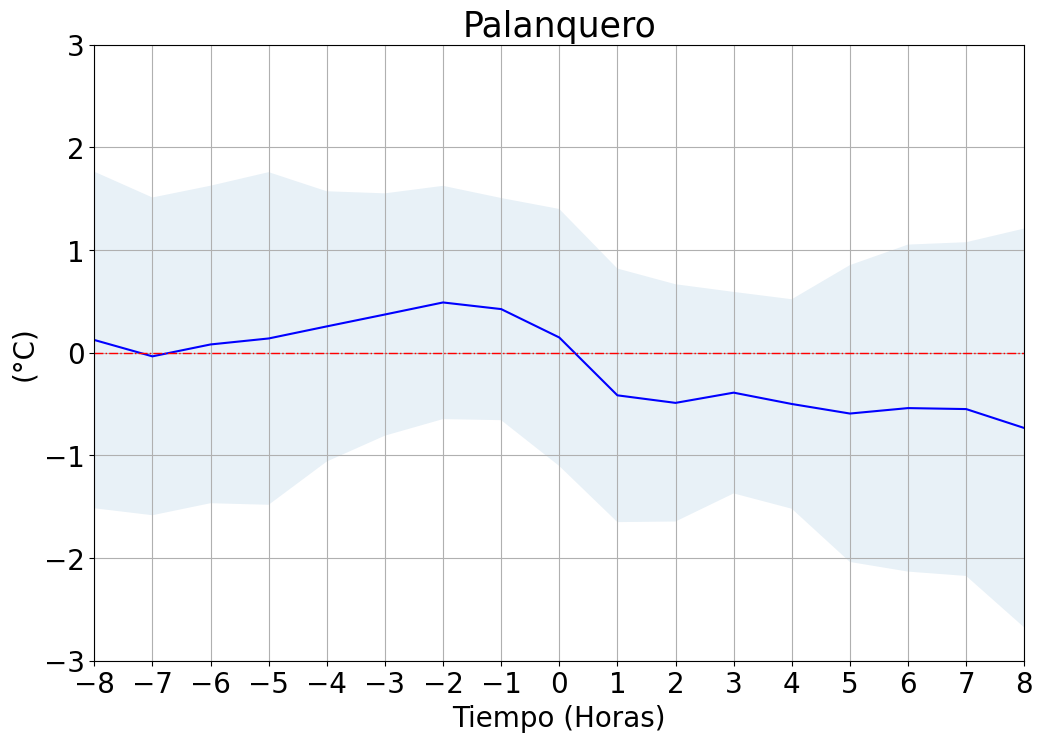

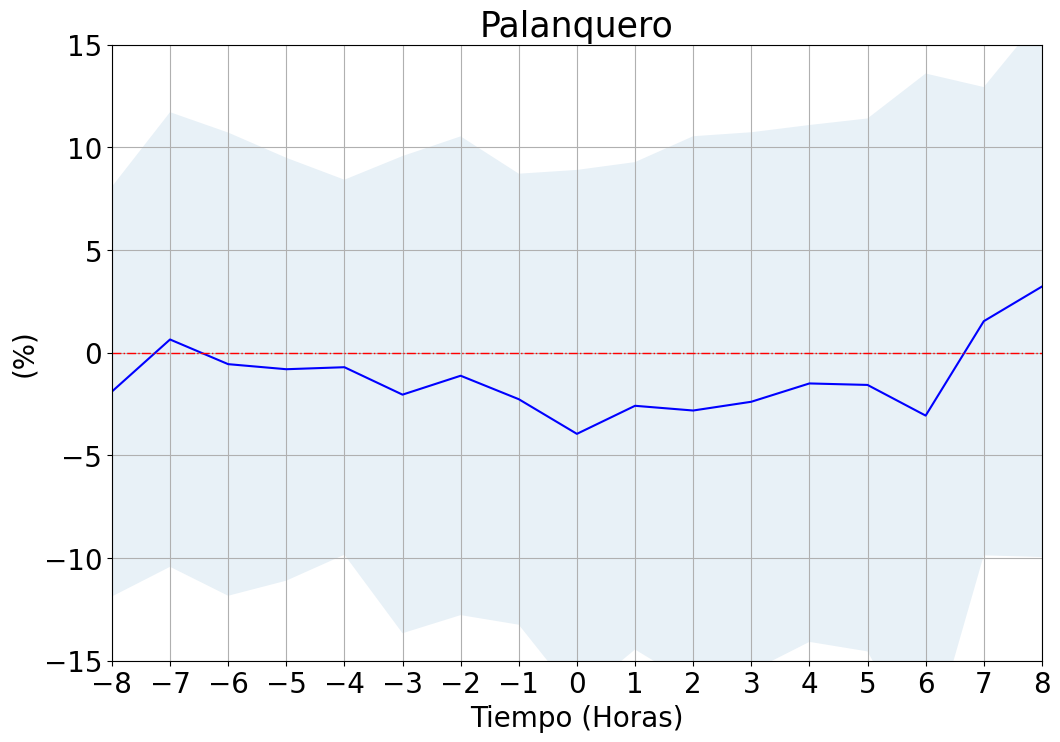

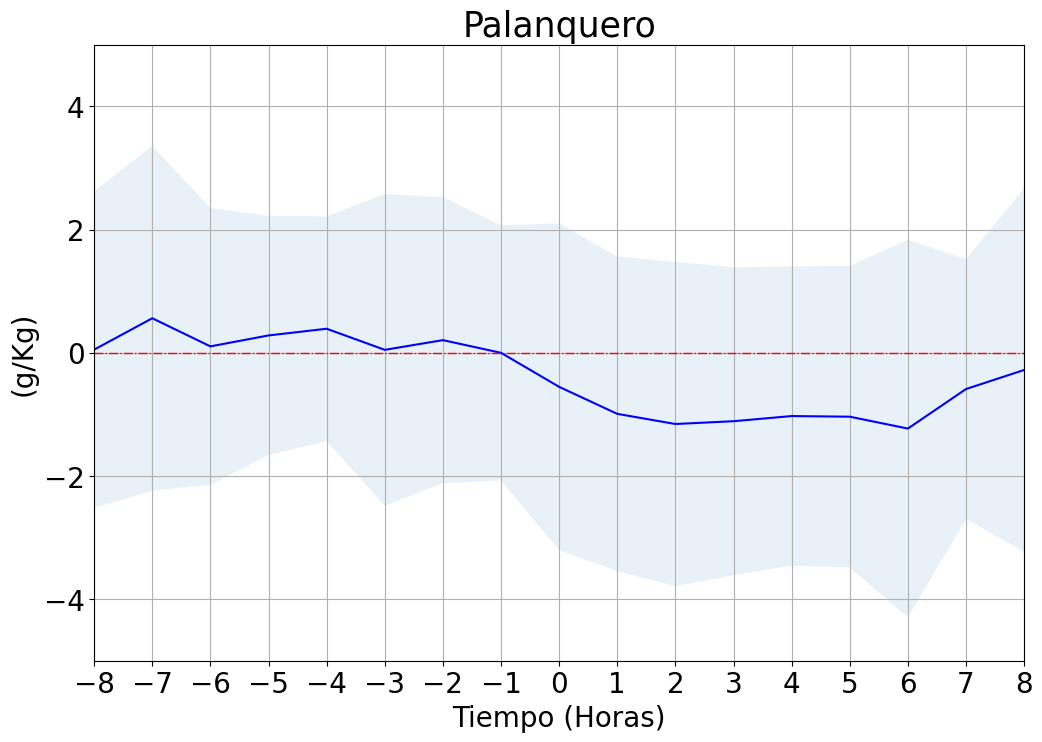

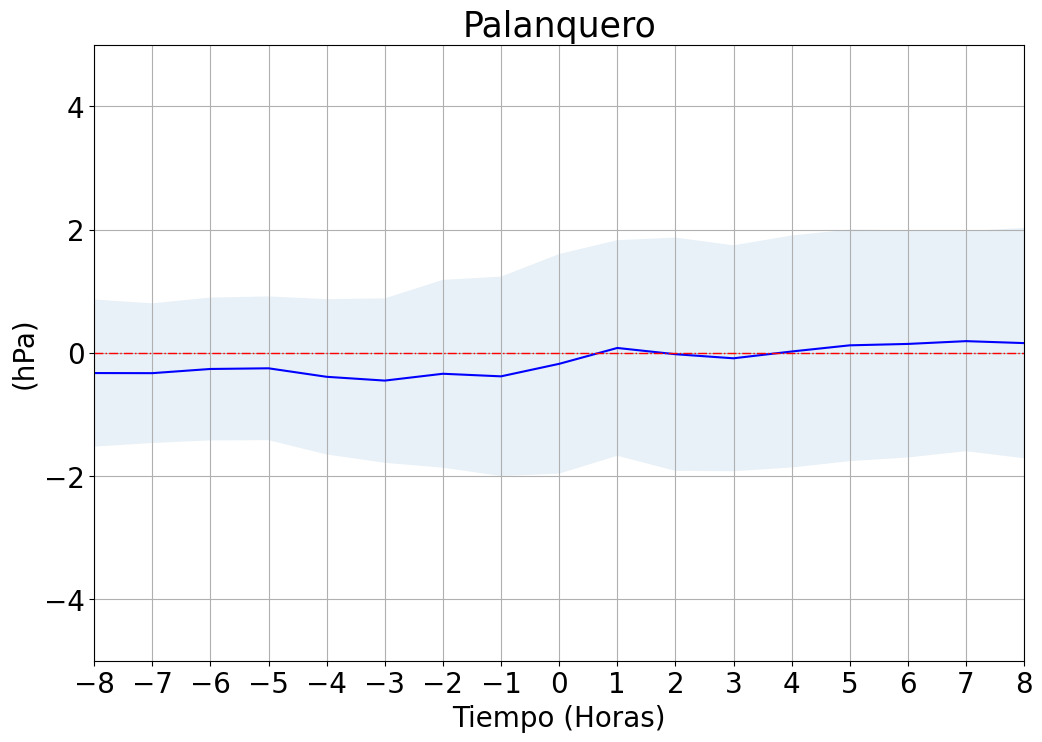

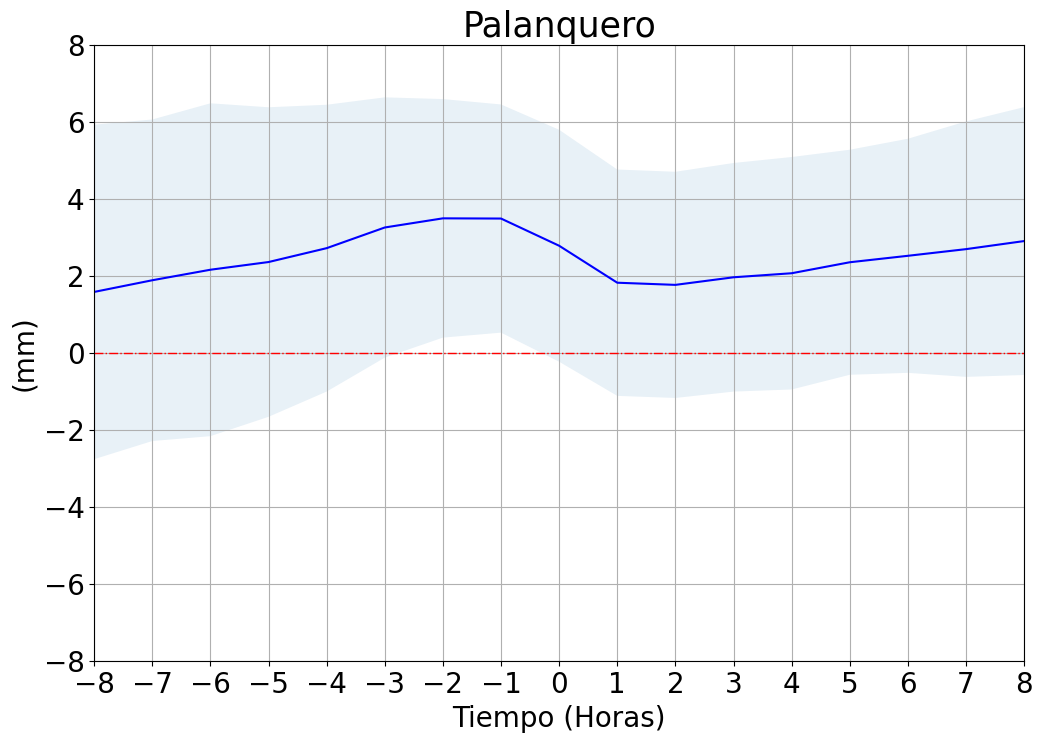

In [ ]:
def plot_anomalias(df, anomalia, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'], fontsize= 20)
  plt.plot(df['FECHA_POS'], df[(anomalia, 'mean')], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[(anomalia, 'mean')] + df[(anomalia, 'std')], df[(anomalia, 'mean')] - df[(anomalia, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Tiempo (Horas)", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 25)
  #plt.yticks(np.arange(-10, 10, 1))
  plt.yticks(fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)', 'ylimit': [-3, 3]},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)', 'ylimit': [-15, 15]},
              'HUM_ESPECIFICA_anomalia' : {'title' : 'Anomalias de Humedad Específica', 'name2save' : f'anomalias_humedad_especifica_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(g/Kg)', 'ylimit': [-5, 5]},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)', 'ylimit': [-5, 5]},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_20h_7h_{NOMBRE_ESTACION}_{int_horas}h_nuevo.png', 'ylabel' : '(mm)', 'ylimit': [-8, 8]}
    }

for key in dict_names:
  plot_anomalias(dfAnomalia, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas, dict_names[key]['ylimit'])

# dfAnomalia

# Gráfico de caja y bigotes para anomalias

In [69]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.cbook import _reshape_2D

# Function adapted from matplotlib.cbook
def my_boxplot_stats(X, whis=1.5, bootstrap=None, labels=None,
                  autorange=False, percents=[25, 75]):

    def _bootstrap_median(data, N=5000):
        # determine 95% confidence intervals of the median
        M = len(data)
        percentiles = [2.5, 97.5]

        bs_index = np.random.randint(M, size=(N, M))
        bsData = data[bs_index]
        estimate = np.median(bsData, axis=1, overwrite_input=True)

        CI = np.percentile(estimate, percentiles)
        return CI

    def _compute_conf_interval(data, med, iqr, bootstrap):
        if bootstrap is not None:
            # Do a bootstrap estimate of notch locations.
            # get conf. intervals around median
            CI = _bootstrap_median(data, N=bootstrap)
            notch_min = CI[0]
            notch_max = CI[1]
        else:

            N = len(data)
            notch_min = med - 1.57 * iqr / np.sqrt(N)
            notch_max = med + 1.57 * iqr / np.sqrt(N)

        return notch_min, notch_max

    # output is a list of dicts
    bxpstats = []

    # convert X to a list of lists
    X = _reshape_2D(X, "X")

    ncols = len(X)
    if labels is None:
        labels = itertools.repeat(None)
    elif len(labels) != ncols:
        raise ValueError("Dimensions of labels and X must be compatible")

    input_whis = whis
    for ii, (x, label) in enumerate(zip(X, labels)):

        # empty dict
        stats = {}
        if label is not None:
            stats['label'] = label

        # restore whis to the input values in case it got changed in the loop
        whis = input_whis

        # note tricksyness, append up here and then mutate below
        bxpstats.append(stats)

        # if empty, bail
        if len(x) == 0:
            stats['fliers'] = np.array([])
            stats['mean'] = np.nan
            stats['med'] = np.nan
            stats['q1'] = np.nan
            stats['q3'] = np.nan
            stats['cilo'] = np.nan
            stats['cihi'] = np.nan
            stats['whislo'] = np.nan
            stats['whishi'] = np.nan
            stats['med'] = np.nan
            continue

        # up-convert to an array, just to be safe
        x = np.asarray(x)

        # arithmetic mean
        stats['mean'] = np.mean(x)

        # median
        med = np.percentile(x, 50)
        ## Altered line
        q1, q3 = np.percentile(x, (percents[0], percents[1]))

        # interquartile range
        stats['iqr'] = q3 - q1
        if stats['iqr'] == 0 and autorange:
            whis = 'range'

        # conf. interval around median
        stats['cilo'], stats['cihi'] = _compute_conf_interval(
            x, med, stats['iqr'], bootstrap
        )

        # lowest/highest non-outliers
        if np.isscalar(whis):
            if np.isreal(whis):
                loval = q1 - whis * stats['iqr']
                hival = q3 + whis * stats['iqr']
            elif whis in ['range', 'limit', 'limits', 'min/max']:
                loval = np.min(x)
                hival = np.max(x)
            else:
                raise ValueError('whis must be a float, valid string, or list '
                                 'of percentiles')
        else:
            loval = np.percentile(x, whis[0])
            hival = np.percentile(x, whis[1])

        # get high extreme
        wiskhi = np.compress(x <= hival, x)
        if len(wiskhi) == 0 or np.max(wiskhi) < q3:
            stats['whishi'] = q3
        else:
            stats['whishi'] = np.max(wiskhi)

        # get low extreme
        wisklo = np.compress(x >= loval, x)
        if len(wisklo) == 0 or np.min(wisklo) > q1:
            stats['whislo'] = q1
        else:
            stats['whislo'] = np.min(wisklo)

        # compute a single array of outliers
        stats['fliers'] = np.hstack([
            np.compress(x < stats['whislo'], x),
            np.compress(x > stats['whishi'], x)
        ])

        # add in the remaining stats
        stats['q1'], stats['med'], stats['q3'] = q1, med, q3

    return bxpstats

def plot_caja_bigote(
    df, ## Dataframe usado para calcular las metricas de cuartiles
    columna_x, ## Nombre de la columna para agrupar
    columna_y, ## Nombre de la columna con la variable
    titulo, ## Titulo de la figura
    rotulo_x, ## Nombre que aparece en el rotulo para el eje X
    rotulo_y, ## Nombre que aparece en el rotulo para el eje Y
    nombre_estacion, ## Nombre de la estación
    nombre_figura, ## Nombre usado para guardar la figura
    path_para_salvar, ## Path para salvar la figura
    lista_xtick=[], ## Colocar para substituir los nombres en el eje X
    ylim=[], ## Colocar para cambiar el rango del gráfico en el eje Y
    cero_vertical=False ## Colocar como True si quiere que aparezca la linea vertical para el dato 0
    ):
  
  stats = {}

  # Compute the boxplot stats (as in the default matplotlib implementation)
  variable_label = df[columna_x].unique()
  variable_label = np.sort(variable_label)
  for var_filter in variable_label:
    df_plot = df[df[columna_y].notnull()]
    df_plot = df_plot[df_plot[columna_x] == var_filter][columna_y].to_numpy()
    stats[var_filter] = my_boxplot_stats(df_plot, percents=[25, 75])[0]
  fig, ax = plt.subplots(1, 1)
  fig.set_size_inches(12,8)
  ax.plot(np.zeros_like(variable_label), color = 'r', linestyle = '-.', linewidth = 1)
  ax.bxp([stats[numb] for numb in stats.keys()], positions=range(len(variable_label)))
  ax.grid()
  ax.set_xlabel(rotulo_x, fontsize=20)
  ax.set_ylabel(rotulo_y, fontsize=20)
  ax.xaxis.set_tick_params(labelsize=20)
  ax.yaxis.set_tick_params(labelsize=20)
  if ylim:
    ax.set_ylim(ylim)
  ax.set_title(nombre_estacion.capitalize(), fontsize= 20)
  if lista_xtick:
    ax.set_xticks(range(0, len(lista_xtick), 1), labels = lista_xtick, fontsize= 20)
    if cero_vertical:
      ax.axvline(x=int(len(lista_xtick)/2), color = 'r')
  fig.savefig(path_para_salvar + nombre_estacion.capitalize() + "_" + nombre_figura, format='png', bbox_inches = 'tight' )

In [71]:
print(int(-1.5))

-1


In [52]:
label_x_values = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [68]:
dfCross

index              FECHA_EVENTO                 FECHA_MIN  min_t   lon_t  \
0        0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
1        0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
2        0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
3        0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
4        0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
..     ...                       ...                       ...    ...     ...   
913     53 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
914     53 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
915     53 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
916     53 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
917     53 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   

     lat_t                      FECHA  FECHA_POS  TEMP   HUM  ...  TEMP_mean  \
0    5.627  2011-01-27 15:00:00-05:00       -8.0  33.8  49.0  ...  33.183180   
1    5.627  2011-01-27 16:00:00-05:00       -7.0  33.5  49.0  ...  32.781034   
2    5.627  2011-01-27 17:00:00-05:00       -6.0  32.2  51.0  ...  31.481422   
3    5.627  2011-01-27 18:00:00-05:00       -5.0  29.1  63.0  ...  28.938304   
4    5.627  2011-01-27 19:00:00-05:00       -4.0  27.0  74.0  ...  27.201797   
..     ...                        ...        ...   ...   ...  ...        ...   
913  5.627  2017-11-14 05:00:00-05:00        4.0  24.4   NaN  ...  23.476396   
914  5.627  2017-11-14 06:00:00-05:00        5.0  24.3   NaN  ...  23.392489   
915  5.627  2017-11-14 07:00:00-05:00        6.0  23.8   NaN  ...  24.552886   
916  5.627  2017-11-14 08:00:00-05:00        7.0  23.8   NaN  ...  26.403856   
917  5.627  2017-11-14 09:00:00-05:00        8.0  24.5   NaN  ...  28.146848   

      HUM_mean  PRESION_mean HUM_ESPECIFICA_mean   PWV_mean  TEMP_anomalia  \
0    58.689104    985.432264           19.338721  52.090380       0.616820   
1    60.300173    985.053976           19.433205  52.364498       0.718966   
2    66.486436    985.328016           19.872631  52.832476       0.718578   
3    78.119296    986.146373           20.182558  53.303802       0.161696   
4    85.668435    987.268009           19.984187  54.618103      -0.201797   
..         ...           ...                 ...        ...            ...   
913  96.861486    989.957486           18.015720  53.615639       0.923604   
914  96.882553    990.549096           17.900100  53.493620       0.907511   
915  94.865966    991.286165           18.849598  53.355961      -0.752886   
916  87.024510    991.815086           19.431882  53.046632      -2.603856   
917  79.742415    991.753458           19.611713  52.836865      -3.646848   

     HUM_anomalia  PRESION_anomalia  HUM_ESPECIFICA_anomalia  PWV_anomalia  
0       -9.689104         -0.332264                -2.443872     -5.097880  
1      -11.300173         -0.353976                -2.817770     -5.415332  
2      -15.486436         -0.528016                -3.827832     -5.758309  
3      -15.119296         -0.246373                -3.683362     -6.834635  
4      -11.668435         -0.368009                -2.911953     -7.144770  
..            ...               ...                      ...           ...  
913           NaN         -3.057486                      NaN      5.471028  
914           NaN         -2.549096                      NaN      5.230547  
915           NaN         -2.286165                      NaN      5.213206  
916           NaN         -2.215086                      NaN      4.669201  
917           NaN         -1.853458                      NaN      5.773135  

[918 rows x 24 columns]

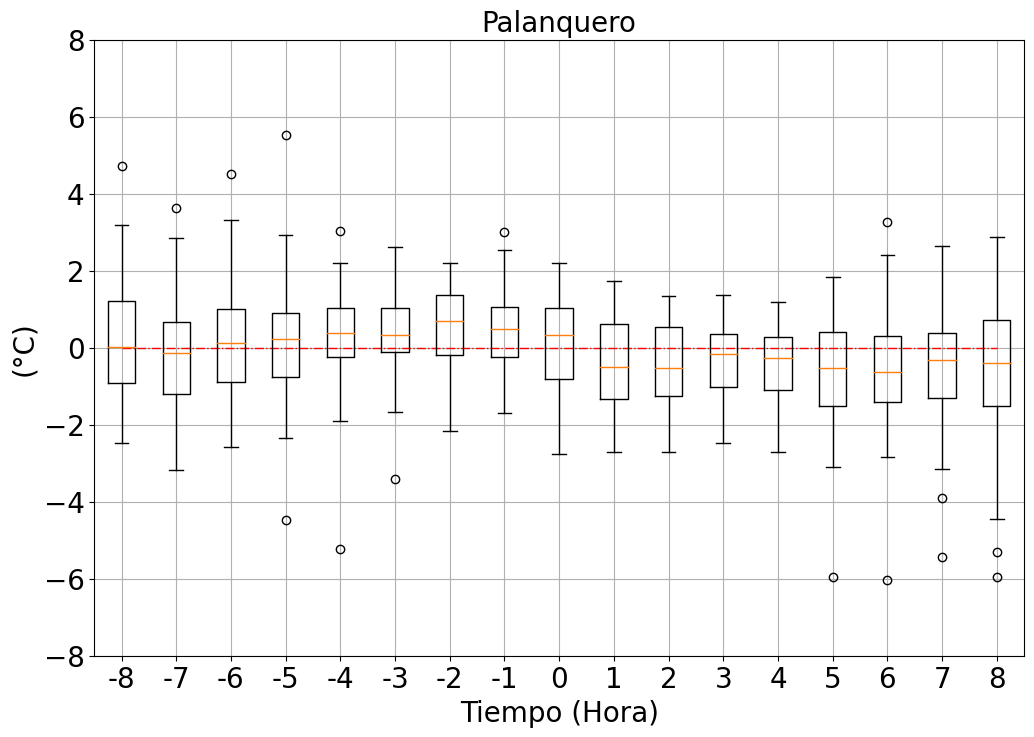

In [53]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="TEMP_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(°C)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_temp_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-8, 8]
)

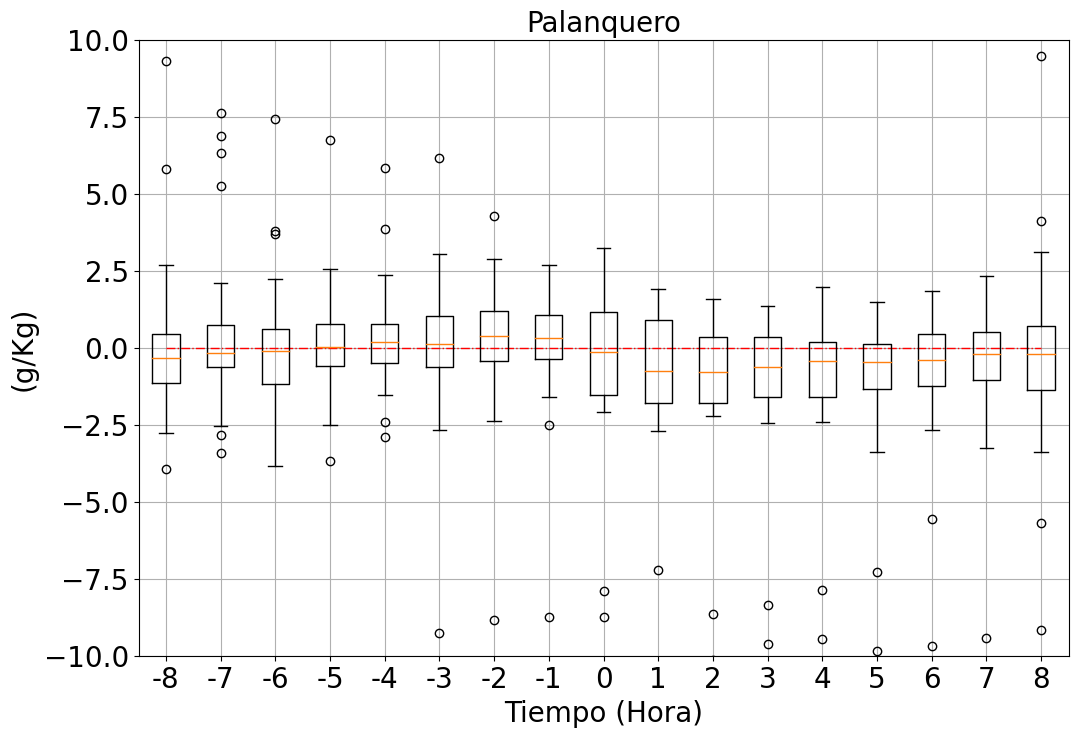

In [ ]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="HUM_ESPECIFICA_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(g/Kg)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_hum_especifica_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-10, 10]
)

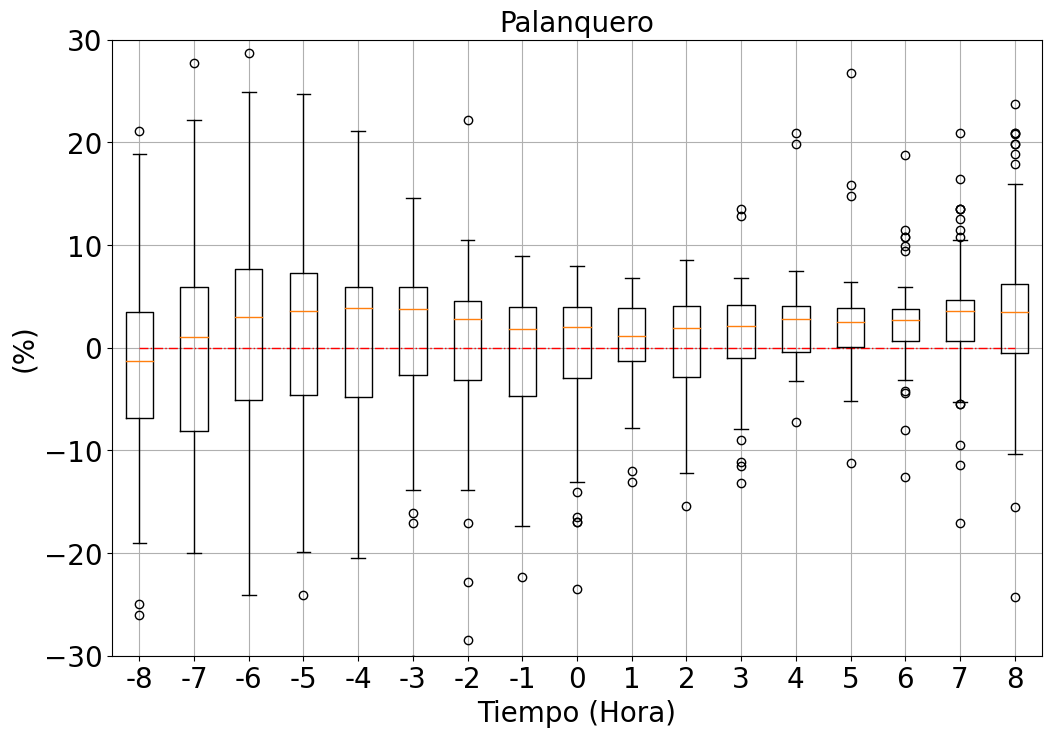

In [ ]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="HUM_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(%)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_HUM_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-30, 30]
)

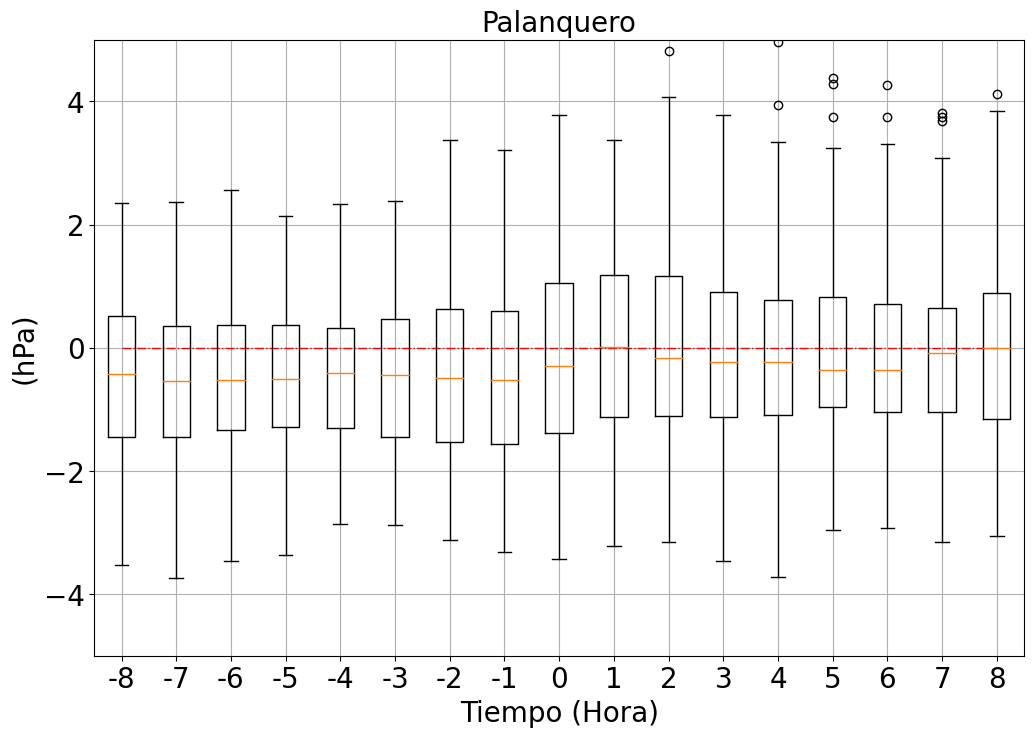

In [ ]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="PRESION_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(hPa)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PRESION_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-5, 5]
)

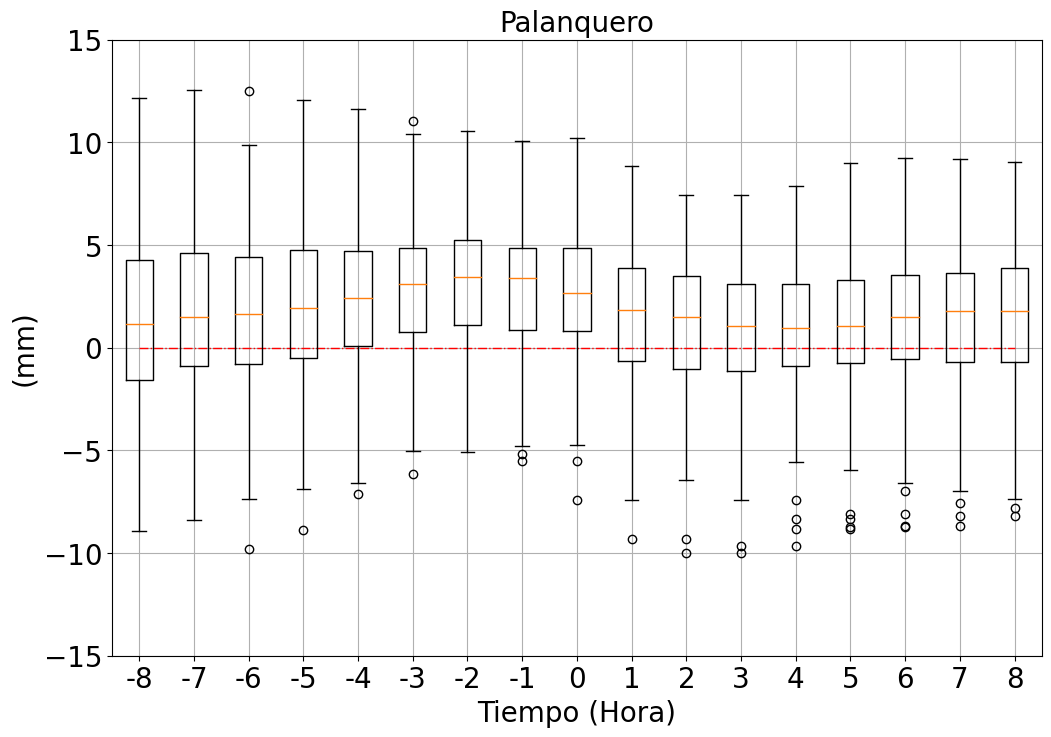

In [ ]:
plot_caja_bigote(
    df=dfCross,
    columna_x="FECHA_POS",
    columna_y="PWV_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Hora)",
    rotulo_y="(mm)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PWV_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values,
    ylim=[-15, 15]
)

# Análisis con los 21 Eventos que tienen todas las variábles metereológicas completas

In [ ]:
dfEventos0 = dfCross.loc[dfCross['FECHA_POS'] == 0.]
dfEventos0 = dfEventos0[['FECHA_EVENTO', 'min_t', 'index'] + columns_mean]
dfEventos0['NUMERO_VARS'] = dfEventos0[columns_mean].notnull().sum(axis=1)
dfEventos0

FECHA_EVENTO  min_t  index  TEMP   HUM  PRESION        PWV  \
8    2011-01-15 00:00:00-05:00  206.7      0  25.5  95.0    988.2  57.093333   
25   2011-01-27 23:00:00-05:00  224.2      1  23.7  92.0    990.2  53.513333   
42   2011-02-03 23:00:00-05:00  195.6      2   NaN  98.0    989.0  53.425000   
59   2011-02-10 22:00:00-05:00  212.6      3  26.1  86.0    989.6  57.304167   
76   2011-03-23 00:00:00-05:00  215.6      4  23.3  96.0    990.8  59.511667   
...                        ...    ...    ...   ...   ...      ...        ...   
2524 2017-11-10 23:00:00-05:00  208.2    148  25.3   NaN    987.7  61.280000   
2541 2017-11-11 00:00:00-05:00  202.6    149  25.5   NaN    988.1  60.694167   
2558 2017-11-14 01:00:00-05:00  196.1    150  25.6   NaN    986.5  60.957500   
2575 2017-12-02 22:00:00-05:00  217.7    151  25.0  97.0    988.7  58.975833   
2592 2017-12-29 00:00:00-05:00  202.5    152  25.3  77.0    990.6  57.951667   

      NUMERO_VARS  
8               4  
25              4  
42              3  
59              4  
76              4  
...           ...  
2524            3  
2541            3  
2558            3  
2575            4  
2592            4  

[153 rows x 8 columns]

In [ ]:
dfEventos0.count()

FECHA_EVENTO    153
min_t           153
index           153
TEMP            108
HUM              80
PRESION         109
PWV             103
NUMERO_VARS     153
dtype: int64

In [ ]:
dfEventos0['NUMERO_VARS'].value_counts()

4    71
0    42
3    38
1     2
Name: NUMERO_VARS, dtype: int64

In [ ]:
dfVarsCompletas = dfEventos0.loc[dfEventos0['NUMERO_VARS'] == 4]
indexVarsCompletas = dfVarsCompletas['index']
dfVarsComp = pd.merge(dfCross, indexVarsCompletas, on = 'index', how = 'inner')

dfAnomaliaVarsComp = dfVarsComp[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()
dfAnomaliaVarsComp

FECHA_POS TEMP_anomalia           HUM_anomalia            PRESION_anomalia  \
                      mean       std         mean        std             mean   
0       -8.0      0.239255  1.572819    -1.279608  11.651012        -0.369895   
1       -7.0      0.215440  1.455931    -1.304029  16.540887        -0.409820   
2       -6.0      0.254263  1.385540    -1.093201  18.041944        -0.400548   
3       -5.0      0.207113  1.516932     1.587871  10.379760        -0.375973   
4       -4.0      0.361452  1.268641     1.180425   9.001985        -0.401162   
5       -3.0      0.411702  1.090571     1.499207   7.849074        -0.418234   
6       -2.0      0.608054  1.016457     0.999711   7.637755        -0.331446   
7       -1.0      0.638847  1.025153    -0.473636   6.384318        -0.363323   
8        0.0      0.284554  1.235788    -2.040656  12.132089        -0.122091   
9        1.0     -0.241727  1.387550     0.267556   6.701051         0.152972   
10       2.0     -0.400336  1.298918    -2.442492  16.247629         0.172951   
11       3.0     -0.499854  1.256247     0.331791   7.610208         0.030708   
12       4.0     -0.634642  1.074933     0.305141  12.171238         0.035363   
13       5.0     -0.564998  1.174487     1.564353   7.876706         0.033931   
14       6.0     -0.528071  1.246167     1.453658   7.587678        -0.041688   
15       7.0     -0.677702  1.385063     1.242242  11.440095         0.114051   
16       8.0     -0.676531  1.907940     2.098341  10.495034         0.120818   

             PWV_anomalia            
         std         mean       std  
0   1.303547     1.015365  4.346752  
1   1.339733     1.368404  4.291008  
2   1.269421     1.540758  4.219185  
3   1.276933     1.717563  4.050891  
4   1.284169     2.214287  3.825136  
5   1.292587     2.580464  3.512883  
6   1.368493     2.941477  3.405310  
7   1.398111     2.987533  3.273934  
8   1.521519     2.576722  3.402843  
9   1.558994     1.758272  3.544956  
10  1.659365     1.070952  3.426359  
11  1.514497     0.780144  3.478271  
12  1.638457     0.659383  3.471791  
13  1.584056     0.639664  3.471110  
14  1.479432     0.735063  3.450621  
15  1.489878     0.984899  3.526440  
16  1.516066     1.085233  3.563693

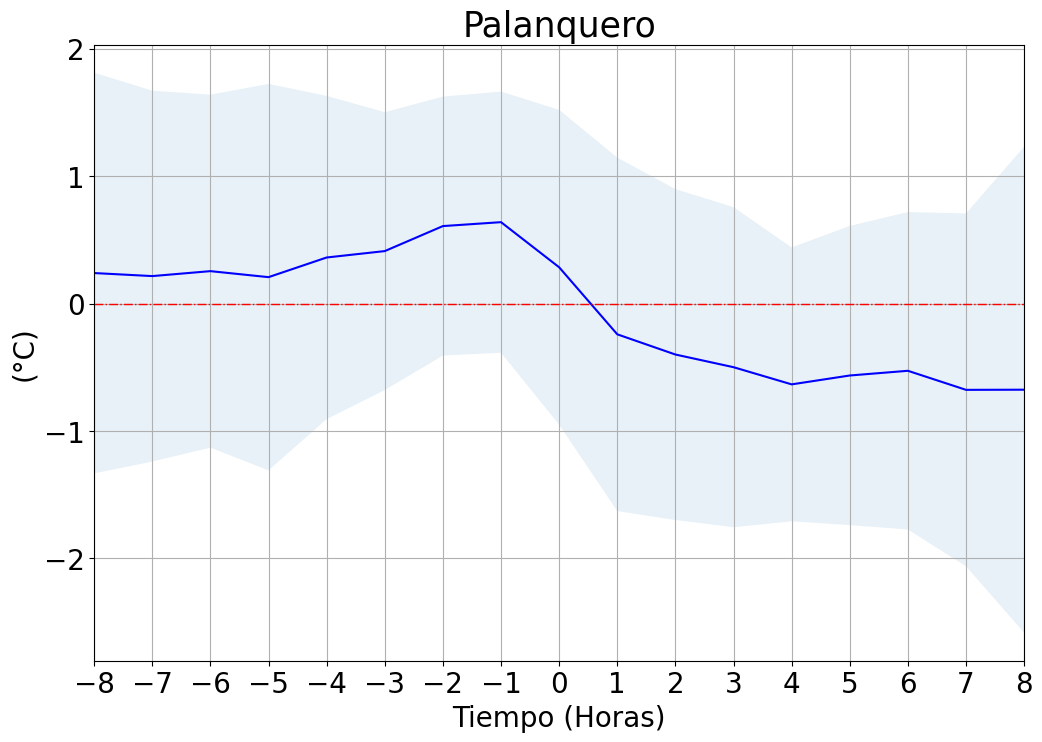

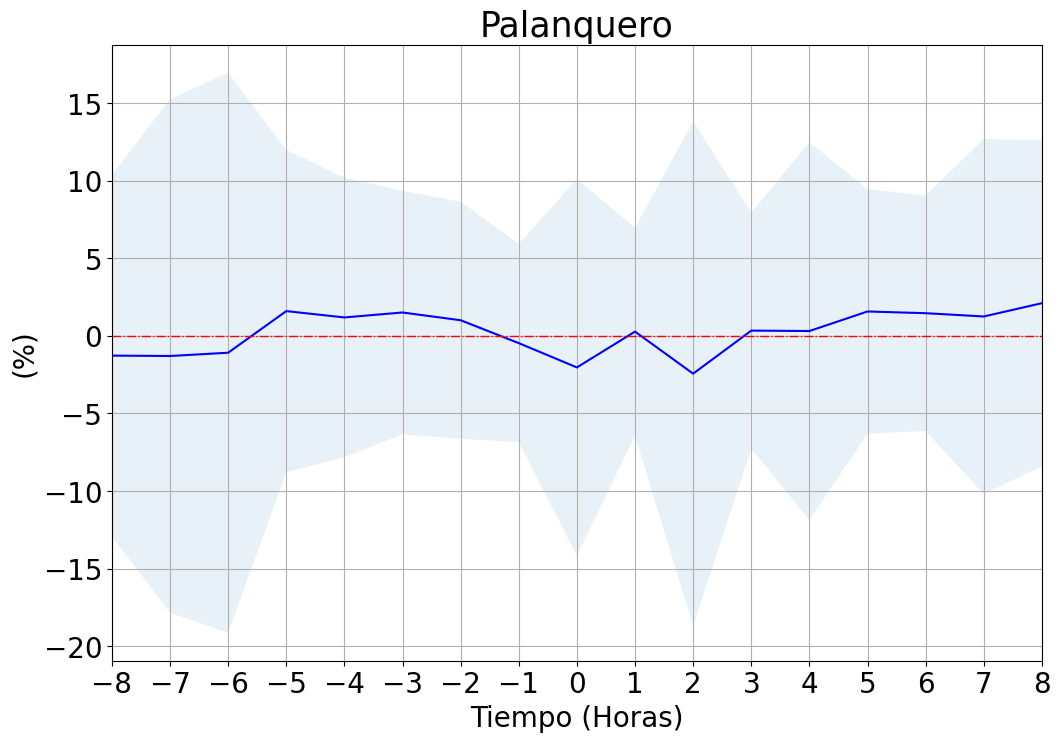

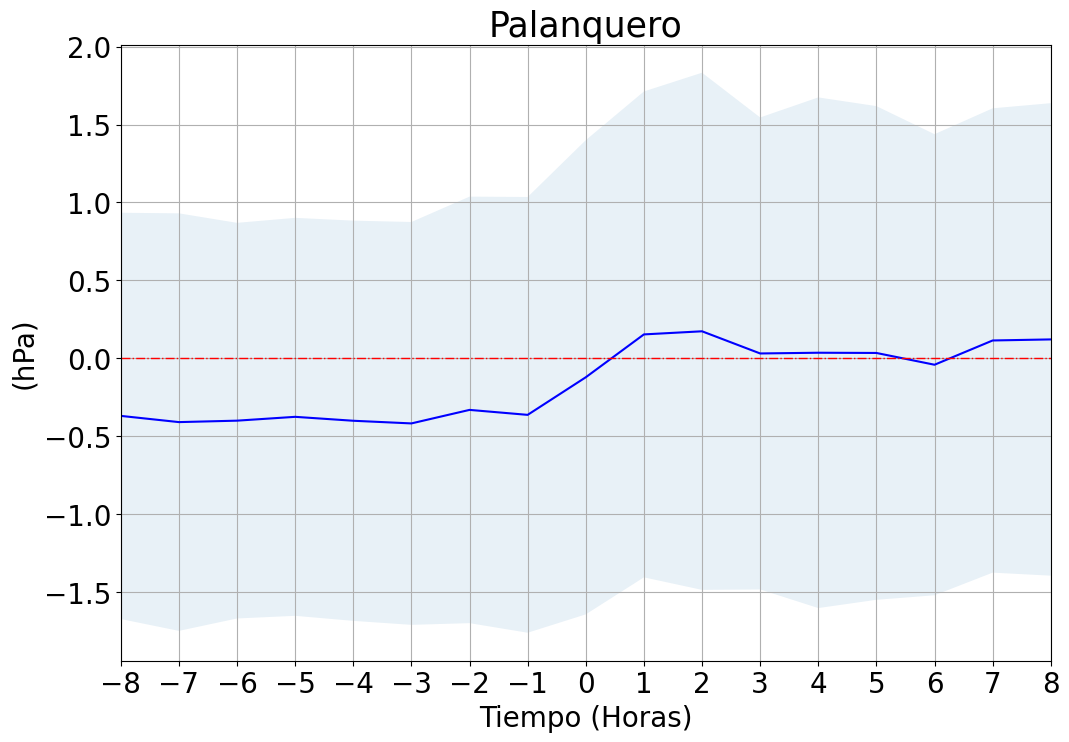

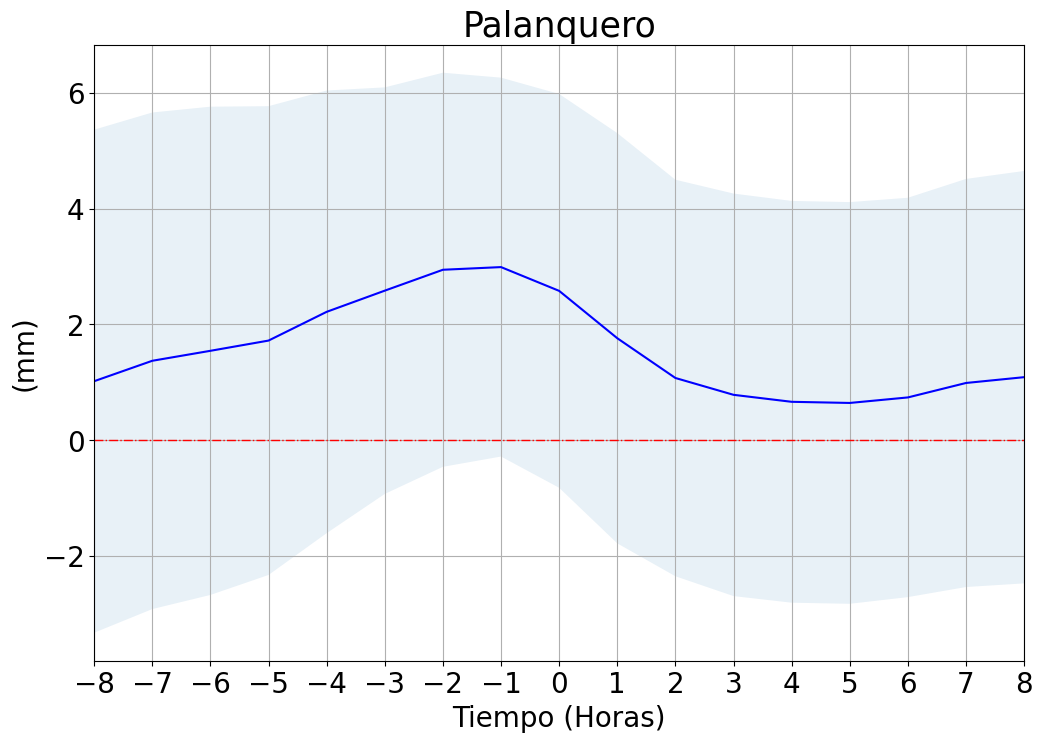

In [ ]:
dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(°C)'},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(%)'},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(hPa)'},
              'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_vars_comp_20h_7h_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : '(mm)'}
    }

for key in dict_names:
  plot_anomalias(dfAnomaliaVarsComp, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

# Análisis para Dirección del Viento 

In [ ]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

# df10mean['DIRVIENTO_mean'] = df10mean.apply(func_dir, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
# df10mean['VELVIENTO_mean'] = df10mean.apply(func_vel, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10m['DIRVIENTO'] = df10m.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
df10m['VELVIENTO'] = df10m.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

In [ ]:
df10m

FECHA_HORA  X_VIENTO  Y_VIENTO HORA                      FECHA  \
0      2011-01-02 00 -0.020676 -0.144283   00  2011-01-02 00:00:00-05:00   
1      2011-01-02 01 -0.010329 -0.114271   01  2011-01-02 01:00:00-05:00   
2      2011-01-02 02 -0.004356 -0.133153   02  2011-01-02 02:00:00-05:00   
3      2011-01-02 03 -0.013790 -0.164974   03  2011-01-02 03:00:00-05:00   
4      2011-01-02 04 -0.002036 -0.116649   04  2011-01-02 04:00:00-05:00   
...              ...       ...       ...  ...                        ...   
41343  2017-12-31 17  0.627704 -1.636584   17  2017-12-31 17:00:00-05:00   
41344  2017-12-31 19 -0.112232  0.016378   19  2017-12-31 19:00:00-05:00   
41345  2017-12-31 20 -0.102170  0.407207   20  2017-12-31 20:00:00-05:00   
41346  2017-12-31 21  0.194049 -0.179630   21  2017-12-31 21:00:00-05:00   
41347  2017-12-31 23  0.058458 -0.204522   23  2017-12-31 23:00:00-05:00   

        DIRVIENTO  VELVIENTO  
0      188.154988   0.145757  
1      185.165060   0.114737  
2      181.873571   0.133225  
3      184.778293   0.165550  
4      181.000000   0.116667  
...           ...        ...  
41343  159.015918   1.752832  
41344  278.302416   0.113421  
41345  345.914990   0.419829  
41346  132.790163   0.264428  
41347  164.048620   0.212713  

[41348 rows x 7 columns]

# Cargando Eventos e encontrando intervalo m minutos antes y después

## Para 10 minutos

In [23]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, 10) if minute > 0 else range(minute, 0, 10))]

dfEventAnMin = dfEventos.copy()

dfEventAnMin['FECHA_ANTES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAnMin['FECHA_DESPUES_MIN'] = dfEventAnMin['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAnMin['FECHA_INTERVALO'] = dfEventAnMin['FECHA_ANTES_MIN'] + dfEventAnMin['FECHA_DESPUES_MIN']
dfEventAnMin = dfEventAnMin.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAnMin['FECHA_POS'] = (dfEventAnMin['FECHA_INTERVALO'] - dfEventAnMin['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAnMin = dfEventAnMin.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAnMin['FECHA'] = dfEventAnMin['FECHA'].astype(str)

dfEventAnMin.head(10)

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  lat_t  \
0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
1 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
2 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
3 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
4 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
5 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
6 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
7 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
8 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
9 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   

                       FECHA  FECHA_POS  
0  2011-01-27 15:20:00-05:00     -480.0  
1  2011-01-27 15:30:00-05:00     -470.0  
2  2011-01-27 15:40:00-05:00     -460.0  
3  2011-01-27 15:50:00-05:00     -450.0  
4  2011-01-27 16:00:00-05:00     -440.0  
5  2011-01-27 16:10:00-05:00     -430.0  
6  2011-01-27 16:20:00-05:00     -420.0  
7  2011-01-27 16:30:00-05:00     -410.0  
8  2011-01-27 16:40:00-05:00     -400.0  
9  2011-01-27 16:50:00-05:00     -390.0

In [24]:
dfCrossPrec = pd.merge(dfEventAnMin, dfPrec, on='FECHA', how = 'left')

dfCrossPrecGroup = dfCrossPrec.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})
dfCrossPrecGroup = dfCrossPrecGroup.rename(columns = {("PREC", "mean") : "PREC_mean", ("PREC", "std") : "PREC_std"}).reset_index()

dfCrossPrecGroup

FECHA_POS      PREC          
                  mean       std
0     -480.0  0.000000  0.000000
1     -470.0  0.004878  0.021808
2     -460.0  0.002439  0.015617
3     -450.0  0.000000  0.000000
4     -440.0  0.002500  0.015811
..       ...       ...       ...
92     440.0  0.014286  0.041739
93     450.0  0.009524  0.029710
94     460.0  0.028571  0.170058
95     470.0  0.042857  0.216562
96     480.0  0.011905  0.039524

[97 rows x 3 columns]

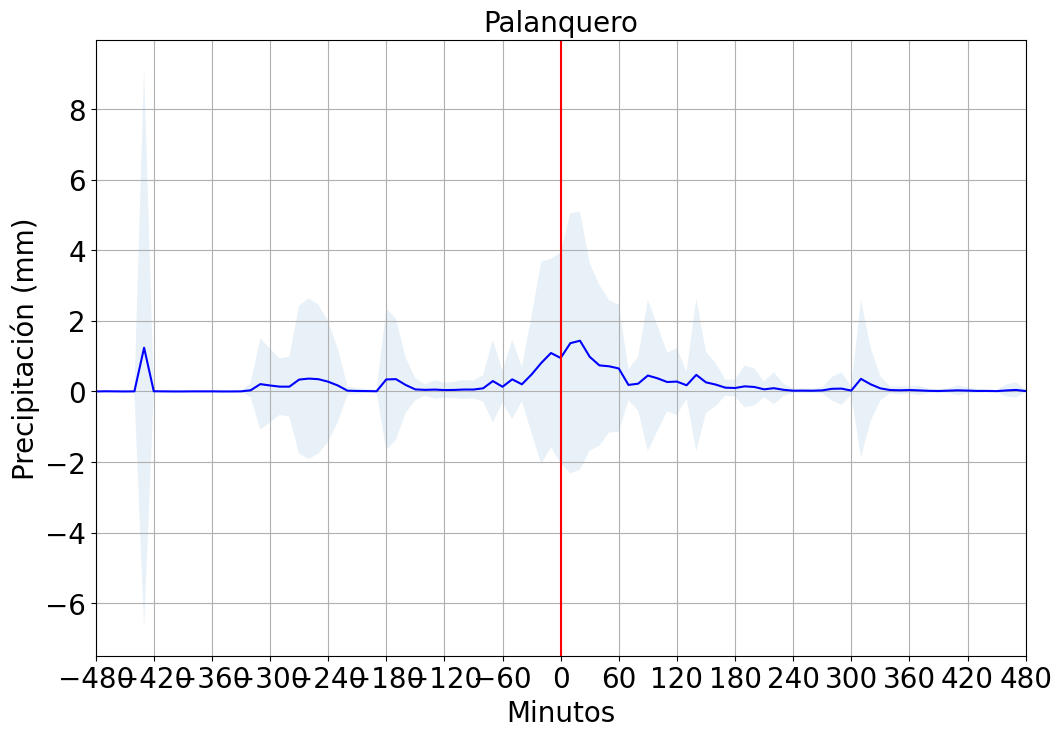

In [25]:
def plot_10m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  # plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PREC' : {'title' : 'Análisis de Precipitación de eventos convectivos', 'name2save' : f'analisis_prec_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Precipitación (mm)'},

    }

for key in dict_names.keys():
  plot_10m_interval(dfCrossPrecGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)


In [ ]:
dfCrossPrec

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
14836 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14837 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14838 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14839 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14840 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

       lat_t                      FECHA  FECHA_POS  PREC  
0      5.627  2011-01-14 16:20:00-05:00     -480.0   0.0  
1      5.627  2011-01-14 16:30:00-05:00     -470.0   0.0  
2      5.627  2011-01-14 16:40:00-05:00     -460.0   0.0  
3      5.627  2011-01-14 16:50:00-05:00     -450.0   0.0  
4      5.627  2011-01-14 17:00:00-05:00     -440.0   0.0  
...      ...                        ...        ...   ...  
14836  5.484  2017-12-29 07:00:00-05:00      440.0   0.0  
14837  5.484  2017-12-29 07:10:00-05:00      450.0   0.0  
14838  5.484  2017-12-29 07:20:00-05:00      460.0   0.0  
14839  5.484  2017-12-29 07:30:00-05:00      470.0   0.0  
14840  5.484  2017-12-29 07:40:00-05:00      480.0   0.0  

[14841 rows x 8 columns]

In [57]:
label_x_values_prec = [str(x) if x%120 == 0 else "" for x in list(range(-480, 481, 10))]

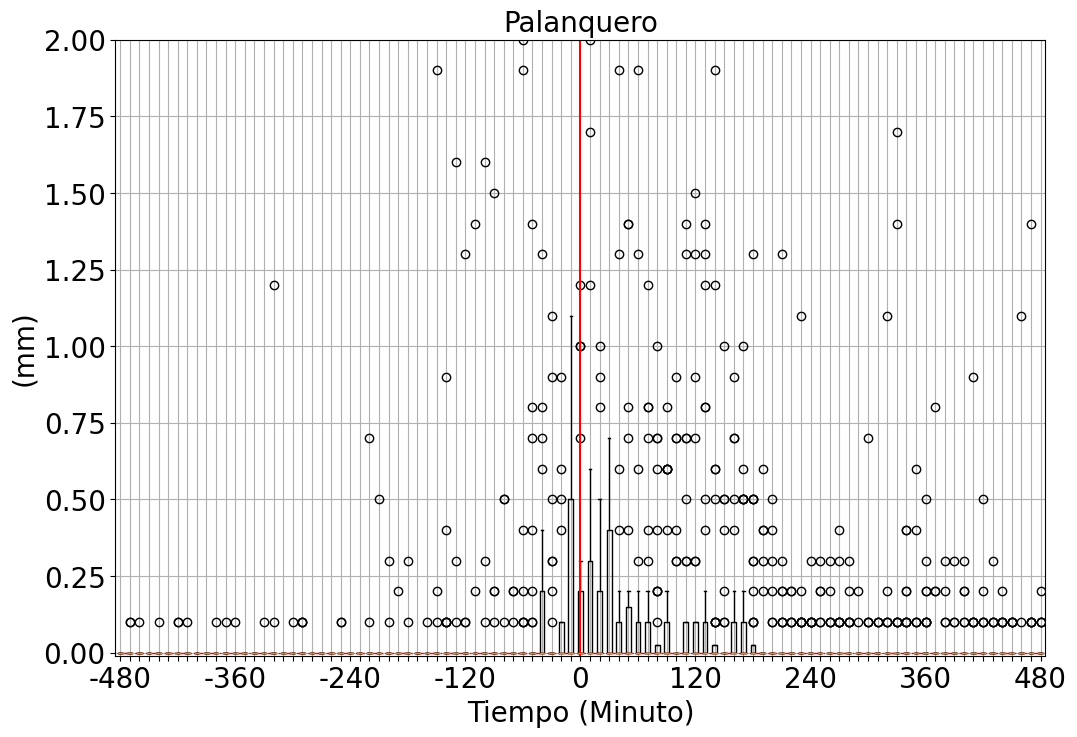

In [73]:
plot_caja_bigote(
    df=dfCrossPrec,
    columna_x="FECHA_POS",
    columna_y="PREC",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Minuto)",
    rotulo_y="(mm)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PREC_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values_prec,
    ylim=[-0.01, 2],
    cero_vertical=True
)

## Para 5 minutos

In [74]:
funtimeMinutes = lambda x, minute : [x + timedelta(minutes = h) for h in (range(0, minute+1, intervalo_minutes_samples_5m) if minute > 0 else range(minute, 0, intervalo_minutes_samples_5m))]

dfEventAn5Min = dfEventos.copy()

dfEventAn5Min['FECHA_ANTES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = -int_minutes)
dfEventAn5Min['FECHA_DESPUES_MIN'] = dfEventAn5Min['FECHA_MIN'].apply(funtimeMinutes, minute = int_minutes)

dfEventAn5Min['FECHA_INTERVALO'] = dfEventAn5Min['FECHA_ANTES_MIN'] + dfEventAn5Min['FECHA_DESPUES_MIN']
dfEventAn5Min = dfEventAn5Min.drop(columns=['FECHA_ANTES_MIN', 'FECHA_DESPUES_MIN']).explode('FECHA_INTERVALO')
dfEventAn5Min['FECHA_POS'] = (dfEventAn5Min['FECHA_INTERVALO'] - dfEventAn5Min['FECHA_MIN'])/ pd.Timedelta(minutes=1)
dfEventAn5Min = dfEventAn5Min.rename(columns={'FECHA_MIN' : 'FECHA_EVENTO', 'FECHA': 'FECHA_HORA', 'FECHA_INTERVALO': 'FECHA'}).reset_index(drop=True)
dfEventAn5Min['FECHA'] = dfEventAn5Min['FECHA'].astype(str)

dfEventAn5Min.head(10)

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  lat_t  \
0 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
1 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
2 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
3 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
4 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
5 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
6 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
7 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
8 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   
9 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693  5.627   

                       FECHA  FECHA_POS  
0  2011-01-27 15:20:00-05:00     -480.0  
1  2011-01-27 15:25:00-05:00     -475.0  
2  2011-01-27 15:30:00-05:00     -470.0  
3  2011-01-27 15:35:00-05:00     -465.0  
4  2011-01-27 15:40:00-05:00     -460.0  
5  2011-01-27 15:45:00-05:00     -455.0  
6  2011-01-27 15:50:00-05:00     -450.0  
7  2011-01-27 15:55:00-05:00     -445.0  
8  2011-01-27 16:00:00-05:00     -440.0  
9  2011-01-27 16:05:00-05:00     -435.0

In [75]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [76]:
### Calculando Dataframe con la media de todos los datos de PWV

dfPWV_5m['HORA'] = dfPWV_5m['FECHA'].apply(lambda x: x[11:16])
dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean_PWV_5m.columns if col != 'HORA']
for col in columns_mean:
  dfmean_PWV_5m = dfmean_PWV_5m.rename(columns={col : f'{col}_mean'})

### Cruzamos los datos con los horarios de los eventos y lo separamos

dfCrossPWV_5m = pd.merge(dfEventAn5Min, dfPWV_5m, on='FECHA', how = 'left')
dfCrossPWV_5m['HORA'] = dfCrossPWV_5m['FECHA'].apply(lambda x: x[11:16])

### Cruzamos con los datos de la media
dfCrossPWV_5m = pd.merge(dfCrossPWV_5m, dfmean_PWV_5m, on = 'HORA', how='left')

### Calculamos la anomalia haciendo (dato - media)
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  dfCrossPWV_5m[anomalia] = dfCrossPWV_5m[f'{col}'] - dfCrossPWV_5m[f'{col}_mean'] 

### Calculo de las medias de los eventos
dfCrossPWV_5mGroup = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV" : ["mean", "std"]})
dfCrossPWV_5mGroup = dfCrossPWV_5mGroup.rename(columns = {("PWV", "mean") : "PWV_mean", ("PWV", "std") : "PWV_std"}).reset_index()

### Agrupamiento para anomalias
dfCrossPWV_5mGroup_anom = dfCrossPWV_5m.groupby("FECHA_POS").agg({"PWV_anomalia" : ["mean", "std"]})
dfCrossPWV_5mGroup_anom = dfCrossPWV_5mGroup_anom.rename(columns = {("PWV_anomalia", "mean") : "PWV_anomalia_mean", ("PWV_anomalia", "std") : "PWV_anomalia_std"}).reset_index()


# dfCrossPWV_5mGroup

<ipython-input-76-bba2a9b4a406>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmean_PWV_5m = dfPWV_5m.groupby('HORA').agg('mean').reset_index(level=0)


## Gráfica de PWV 5 minutos

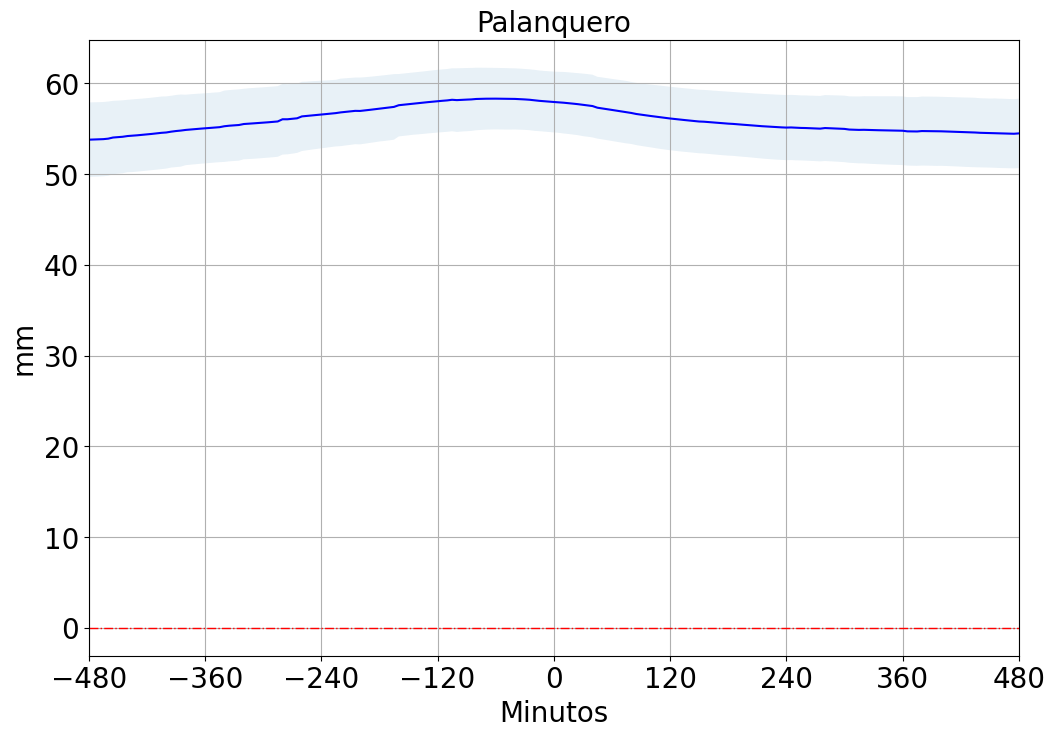

In [ ]:
def plot_5m_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 24
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[(campo, 'mean')], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[(campo, 'mean')] + df[(campo, 'std')], df[(campo, 'mean')] - df[(campo, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  #plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'PWV' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

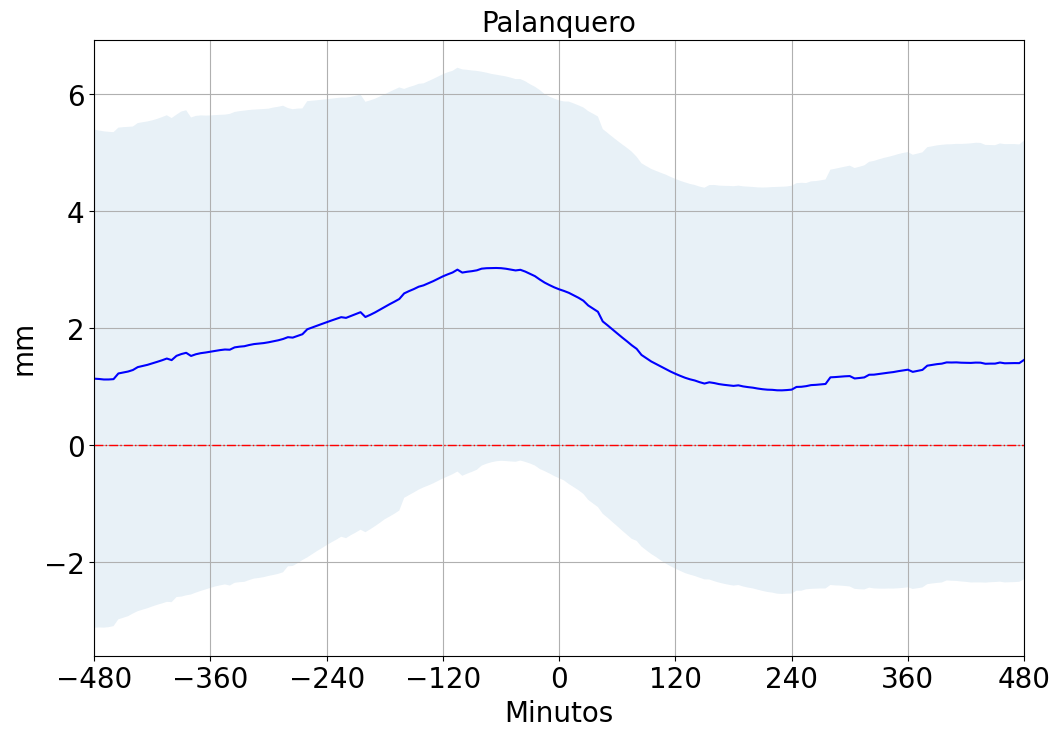

In [ ]:
dict_names = {'PWV_anomalia' : {'title' : 'Palanquero', 'name2save' : f'analisis_pwv_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_5min_anomalia_nuevo.png', 'ylabel' : 'mm'},

    }

for key in dict_names.keys():
  plot_5m_interval(dfCrossPWV_5mGroup_anom, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes)

## Análisis de percentiles - Precipitación

In [ ]:
def plot_percentil_interval_prec(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency],fontsize=20)
  plt.yticks(fontsize=20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  #plt.plot(df['FECHA_POS'], df[.5], label = f"Percentil")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], linestyle = '--')

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  plt.ylim(0,1.2)
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos",fontsize=20)
  plt.ylabel(ylabel_name,fontsize=20)
  plt.title("Palanquero",fontsize=20)
  plt.legend(fontsize=20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [ ]:
dfCrossPrec

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  \
0     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
1     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
2     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
3     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
4     2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7 -74.836   
...                         ...                       ...    ...     ...   
14836 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14837 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14838 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14839 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   
14840 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5 -74.836   

       lat_t                      FECHA  FECHA_POS  PREC  
0      5.627  2011-01-14 16:20:00-05:00     -480.0   0.0  
1      5.627  2011-01-14 16:30:00-05:00     -470.0   0.0  
2      5.627  2011-01-14 16:40:00-05:00     -460.0   0.0  
3      5.627  2011-01-14 16:50:00-05:00     -450.0   0.0  
4      5.627  2011-01-14 17:00:00-05:00     -440.0   0.0  
...      ...                        ...        ...   ...  
14836  5.484  2017-12-29 07:00:00-05:00      440.0   0.0  
14837  5.484  2017-12-29 07:10:00-05:00      450.0   0.0  
14838  5.484  2017-12-29 07:20:00-05:00      460.0   0.0  
14839  5.484  2017-12-29 07:30:00-05:00      470.0   0.0  
14840  5.484  2017-12-29 07:40:00-05:00      480.0   0.0  

[14841 rows x 8 columns]

<ipython-input-111-eeefdfe27620>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")


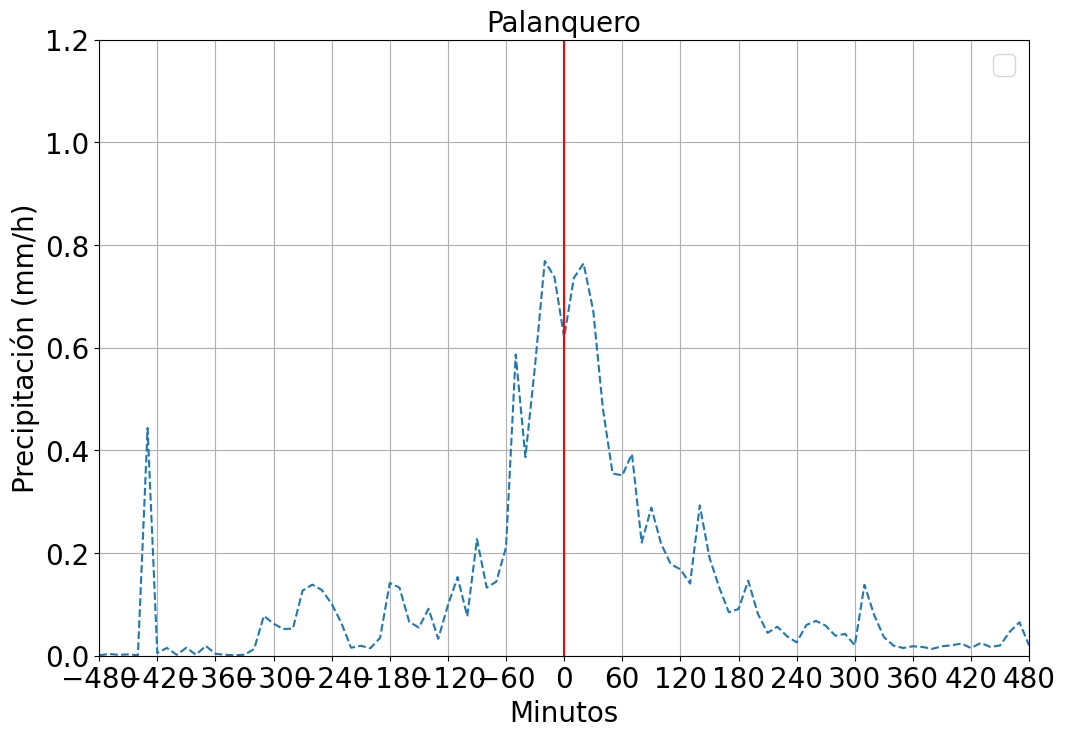

In [ ]:
list_percentil = [ 0.05, .1, .20, .25, .50, .75, .80, .90, 0.95]
dfCrossPrecNotNan = dfCrossPrec.dropna().reset_index()
dfPercentilPrec= dfCrossPrecNotNan.groupby("FECHA_POS")['PREC'].quantile(list_percentil).reset_index()
dfAggPrec = dfCrossPrecNotNan.groupby("FECHA_POS").agg({"PREC" : ["mean", "std"]})

dfPercentilPrec = dfPercentilPrec.pivot(index='FECHA_POS', columns='level_1')['PREC'].reset_index()
dfPercentilPrec = dfPercentilPrec.join(dfAggPrec, "FECHA_POS")

dict_names = {'title' : 'Análisis de precipitación', 
              'name2save' : f'analisis_precipitacion_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 
              'ylabel' : 'Precipitación (mm/h)'
              }

plot_percentil_interval_prec(dfPercentilPrec, [.10, .10], 'PREC', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes)

In [ ]:
dfPercentilPrec

FECHA_POS  0.05  0.1  0.2  0.25  0.5  0.75  0.8   0.9  0.95  (PREC, mean)  \
0        -480   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.0      0.000847   
1        -470   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.0      0.003448   
2        -460   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.0      0.001724   
3        -450   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.0      0.002586   
4        -440   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.0      0.000870   
..        ...   ...  ...  ...   ...  ...   ...  ...   ...   ...           ...   
92        440   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.1      0.017094   
93        450   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.01   0.1      0.020000   
94        460   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.1      0.046667   
95        470   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.1      0.065289   
96        480   0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.00   0.1      0.019835   

    (PREC, std)  CERO  
0      0.009206     0  
1      0.018326     0  
2      0.013073     0  
3      0.015941     0  
4      0.009325     0  
..          ...   ...  
92     0.096749     0  
93     0.096667     0  
94     0.345422     0  
95     0.515705     0  
96     0.090018     0  

[97 rows x 13 columns]

In [ ]:
dfCrossPrecNotNan[dfCrossPrecNotNan['FECHA_POS'] == 0]

index                FECHA_HORA              FECHA_EVENTO  min_t  \
48        48 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
145      145 2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2   
242      242 2011-02-03 23:00:00-05:00 2011-02-03 23:20:00-05:00  195.6   
339      339 2011-02-10 22:00:00-05:00 2011-02-10 21:40:00-05:00  212.6   
436      436 2011-03-23 00:00:00-05:00 2011-03-22 23:40:00-05:00  215.6   
...      ...                       ...                       ...    ...   
10238  14404 2017-11-10 23:00:00-05:00 2017-11-10 23:20:00-05:00  208.2   
10335  14501 2017-11-11 00:00:00-05:00 2017-11-10 23:40:00-05:00  202.6   
10432  14598 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1   
10529  14695 2017-12-02 22:00:00-05:00 2017-12-02 21:40:00-05:00  217.7   
10626  14792 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

        lon_t  lat_t                      FECHA  FECHA_POS  PREC  
48    -74.836  5.627  2011-01-15 00:20:00-05:00        0.0   0.0  
145   -74.693  5.627  2011-01-27 23:20:00-05:00        0.0   0.0  
242   -74.836  5.627  2011-02-03 23:20:00-05:00        0.0   1.9  
339   -74.836  5.627  2011-02-10 21:40:00-05:00        0.0   0.0  
436   -74.836  5.341  2011-03-22 23:40:00-05:00        0.0   0.5  
...       ...    ...                        ...        ...   ...  
10238 -74.693  5.484  2017-11-10 23:20:00-05:00        0.0   0.0  
10335 -74.836  5.341  2017-11-10 23:40:00-05:00        0.0   0.0  
10432 -74.693  5.627  2017-11-14 00:40:00-05:00        0.0   0.0  
10529 -74.836  5.484  2017-12-02 21:40:00-05:00        0.0   0.0  
10626 -74.836  5.484  2017-12-28 23:40:00-05:00        0.0   0.0  

[109 rows x 9 columns]

# Análisis de Viento

In [81]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[x], df[y])) if np.arctan2(df[x], df[y]) > 0 else 360 + np.rad2deg(np.arctan2(df[x], df[y]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

In [82]:
dfEventAnMin['HORA_MINUTO'] = dfEventAnMin['FECHA'].apply(lambda x: x[11:16])
dfEventAnMin

FECHA_HORA              FECHA_EVENTO  min_t   lon_t  \
0    2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
1    2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
2    2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
3    2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
4    2011-01-27 23:00:00-05:00 2011-01-27 23:20:00-05:00  224.2 -74.693   
...                        ...                       ...    ...     ...   
5233 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
5234 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
5235 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
5236 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   
5237 2017-11-14 01:00:00-05:00 2017-11-14 00:40:00-05:00  196.1 -74.693   

      lat_t                      FECHA  FECHA_POS HORA_MINUTO  
0     5.627  2011-01-27 15:20:00-05:00     -480.0       15:20  
1     5.627  2011-01-27 15:30:00-05:00     -470.0       15:30  
2     5.627  2011-01-27 15:40:00-05:00     -460.0       15:40  
3     5.627  2011-01-27 15:50:00-05:00     -450.0       15:50  
4     5.627  2011-01-27 16:00:00-05:00     -440.0       16:00  
...     ...                        ...        ...         ...  
5233  5.627  2017-11-14 08:00:00-05:00      440.0       08:00  
5234  5.627  2017-11-14 08:10:00-05:00      450.0       08:10  
5235  5.627  2017-11-14 08:20:00-05:00      460.0       08:20  
5236  5.627  2017-11-14 08:30:00-05:00      470.0       08:30  
5237  5.627  2017-11-14 08:40:00-05:00      480.0       08:40  

[5238 rows x 8 columns]

In [79]:
dfViento['HORA_MINUTO'] = dfViento['FECHA'].apply(lambda x: x[11:16])
dfViento

dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)
dfVientoMean = dfVientoMean.rename(columns={"VELVIENTO":"VELVIENTO_mean"})

<ipython-input-79-23248fbf0cea>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfVientoMean = dfViento.groupby('HORA_MINUTO').agg('mean').reset_index(level=0)


In [83]:
dfCrossVientos = pd.merge(dfEventAnMin[['HORA_MINUTO', 'FECHA_POS', 'FECHA']], dfViento[[col for col in dfViento.columns if col != "HORA_MINUTO" ]], on='FECHA', how = 'left')
dfCrossVientos = pd.merge(dfCrossVientos, dfVientoMean[['HORA_MINUTO', 'VELVIENTO_mean']], on='HORA_MINUTO', how = 'left')

### Cálculo de la anomalia
dfCrossVientos['VEL_VIENTO_anomalia'] = dfCrossVientos['VELVIENTO'] - dfCrossVientos['VELVIENTO_mean']

dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : "mean", "VEL_VIENTO_anomalia" : "std"}).reset_index()
# dfCrossVientosGroup
# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()

dfCrossVientosGroup2 = pd.DataFrame()
dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "std") ]
dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VEL_VIENTO_anomalia", "mean") ]

In [ ]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
14836       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
14837       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
14838       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
14839       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
14840       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
14836        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
14837        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
14838        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
14839        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
14840        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
14836             0.660764  
14837             0.141434  
14838             0.421084  
14839             0.202349  
14840             0.579398  

[14841 rows x 10 columns]

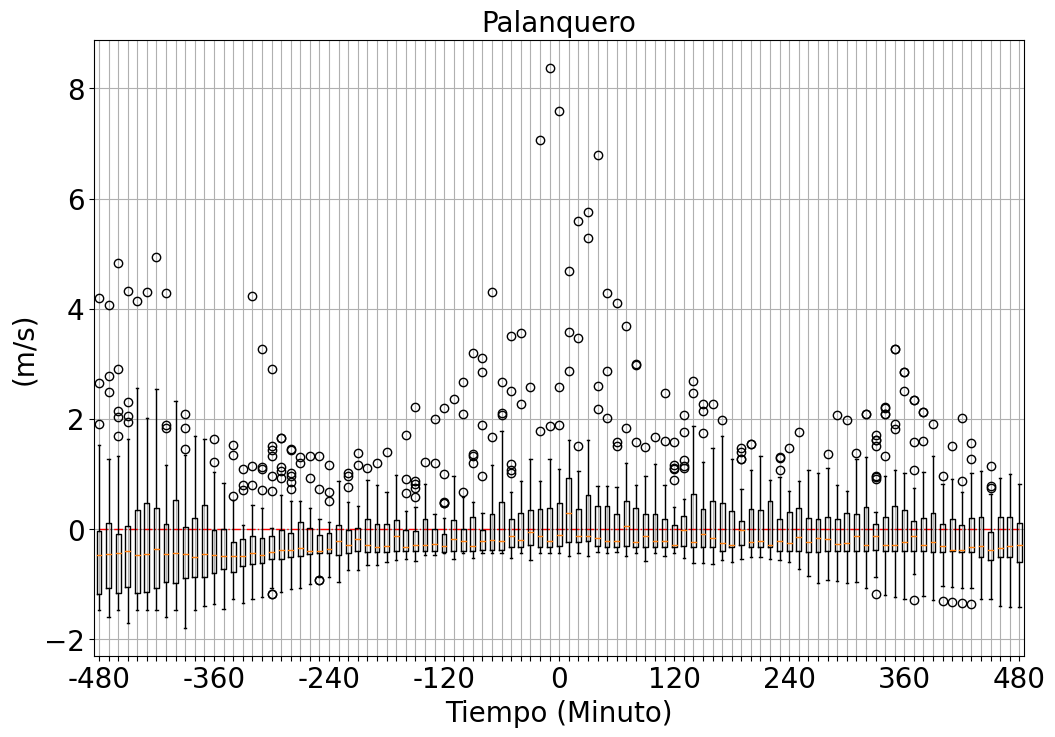

In [86]:
plot_caja_bigote(
    df=dfCrossVientos,
    columna_x="FECHA_POS",
    columna_y="VEL_VIENTO_anomalia",
    titulo=NOMBRE_ESTACION.capitalize(),
    rotulo_x="Tiempo (Minuto)",
    rotulo_y="(m/s)",
    nombre_estacion=NOMBRE_ESTACION,
    nombre_figura="grafico_PREC_caja_bigote_palanquero_horario",
    path_para_salvar=PATH_FINAL_FIGURAS_ANOMALIAS,
    lista_xtick=label_x_values_prec,
    #plt.xlim=[-480,480]
    #ylim=[-8, 8]
)

# Revisando cuantos datos tenemos en el tiempo=0

In [ ]:
cols_vientos = ["VELVIENTO", "DIRECVIENTO"]

dfEventos0Vientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 0.].copy()
dfEventos0Vientos['NUMERO_VARS'] = dfEventos0Vientos[cols_vientos].notnull().sum(axis=1)
dfEventos0Vientos.count()

HORA_MINUTO            153
FECHA_POS              153
FECHA                  153
DIRECVIENTO             95
VELVIENTO               95
FECHA_HORA              95
X_VIENTO                95
Y_VIENTO                95
VELVIENTO_mean         153
VEL_VIENTO_anomalia     95
NUMERO_VARS            153
dtype: int64

In [ ]:
cols_prec = ["PREC"]

dfEventos0Prec = dfCrossPrec.loc[dfCrossPrec['FECHA_POS'] == 0.].copy()
dfEventos0Prec['NUMERO_VARS'] = dfEventos0Prec[cols_prec].notnull().sum(axis=1)
dfEventos0Prec.count()


FECHA_HORA      153
FECHA_EVENTO    153
min_t           153
lon_t           153
lat_t           153
FECHA           153
FECHA_POS       153
PREC            109
NUMERO_VARS     153
dtype: int64

In [ ]:
# dfCrossVientos = pd.merge(dfEventAnMin, dfViento, on='FECHA', how = 'left')
# dfCrossVientos = dfCrossVientos.loc[dfCrossVientos['FECHA_POS'] == 240]
# dfCrossVientos["X_VIENTO_STD"] = dfCrossVientos["X_VIENTO"]
# dfCrossVientos["Y_VIENTO_STD"] = dfCrossVientos["Y_VIENTO"]


# dfCrossVientosGroup = dfCrossVientos.groupby("FECHA_POS").agg({"VELVIENTO" : ["mean", "std"]}).reset_index()
# dfCrossVientosGroup = dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})
# dfCrossVientosGroup2 = pd.DataFrame()
# dfCrossVientosGroup2['FECHA_POS'] = dfCrossVientosGroup[('FECHA_POS',     '')]
# dfCrossVientosGroup2['VEL_VIENTO_STD'] = dfCrossVientosGroup[("VELVIENTO", "std") ]
# dfCrossVientosGroup2['VEL_VIENTO_MEAN'] = dfCrossVientosGroup[("VELVIENTO", "mean") ]

# dfCrossVientosGroup.rename(columns = {("VELVIENTO", "mean") : "VEL_VIENTO_mean", ("VELVIENTO", "std") : "VEL_VIENTO_std", ('FECHA_POS',     '') : "FECHA_POS"})

# dfCrossVientosGroup['DIR_VIENTO'] = dfCrossVientosGroup.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['DIR_VIENTO'] = (dfCrossVientosGroup['DIR_VIENTO'] + 180.0) % 360
# dfCrossVientosGroup['VEL_VIENTO'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_MEAN'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
# dfCrossVientosGroup['VEL_VIENTO_STD'] = dfCrossVientosGroup.apply(func_vel, x = 'X_VIENTO_STD', y='Y_VIENTO_STD', axis=1)

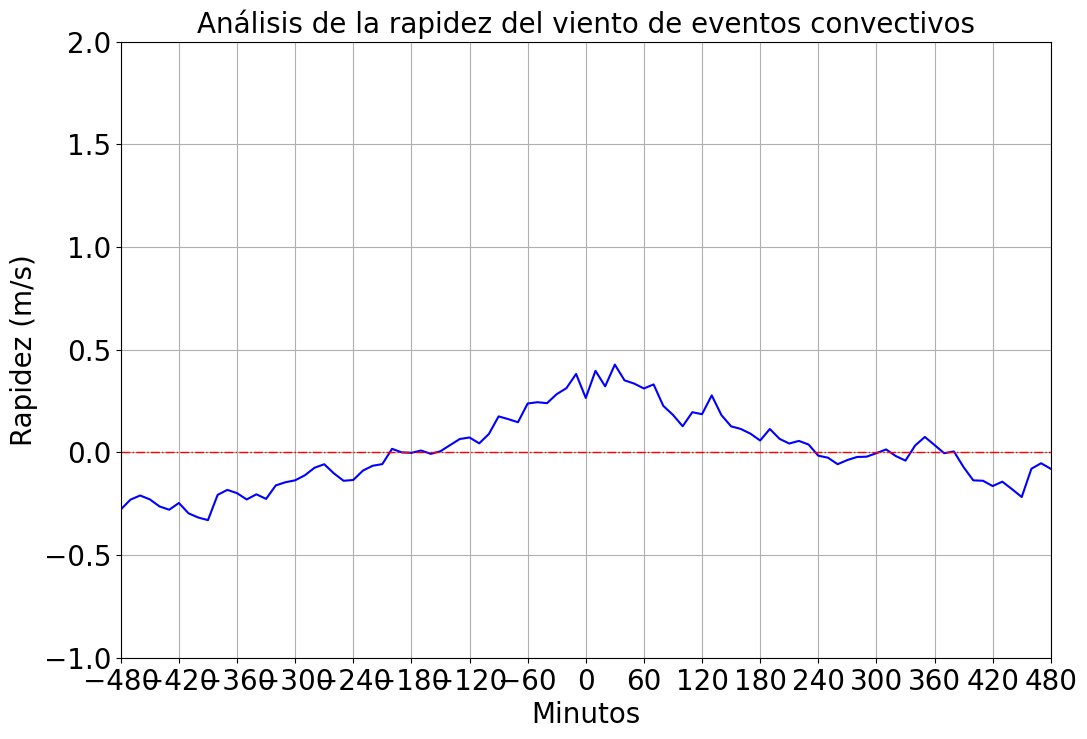

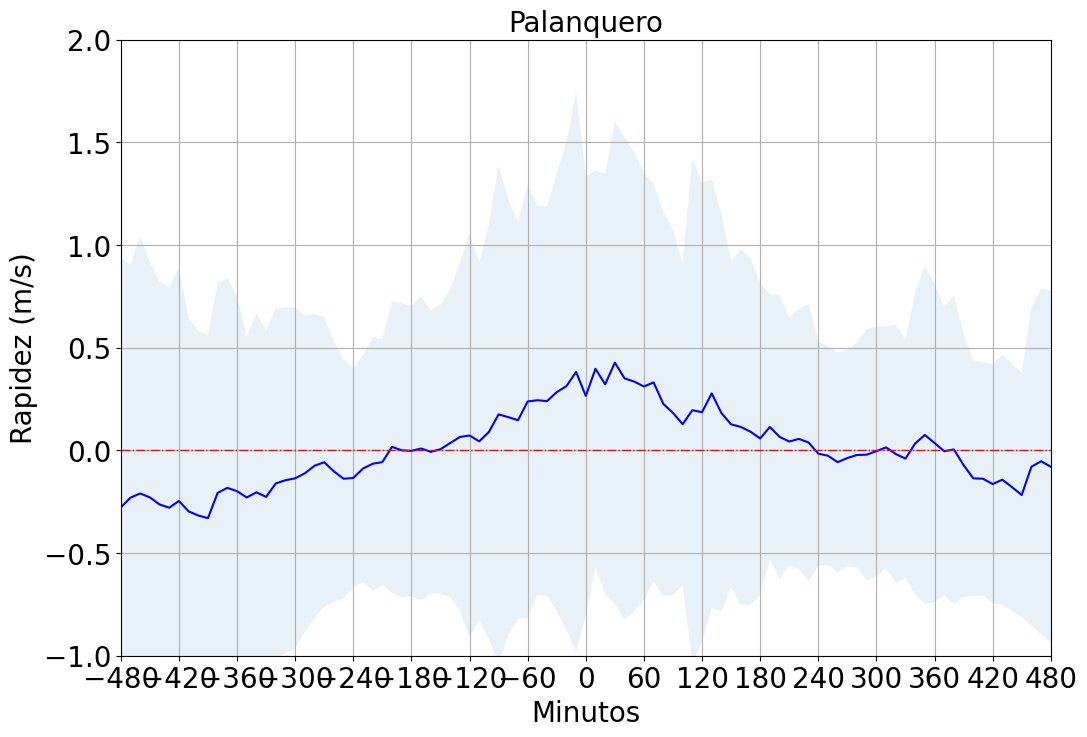

In [ ]:
def plot_10m_interval_v2(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  # plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title(titulo, fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

def plot_dir_viento_interval(df, campo, titulo, name_to_save, ylabel_name, int_minutes, ylimit = [], has_std = True):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(range(0, 361, 45), fontsize= 20)
  if has_std:
    plt.plot(df['FECHA_POS'], df[f"{campo}_MEAN"], color = 'b')
    plt.fill_between(df['FECHA_POS'], df[f"{campo}_MEAN"] + df[f"{campo}_STD"], df[f"{campo}_MEAN"] - df[f"{campo}_STD"], alpha=.1, linestyle = '--', linewidth = 0.5)
  else:
    plt.plot(df['FECHA_POS'], df[campo], color = 'b')
  plt.grid()
  plt.axvline(color = 'r')
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'DIR_VIENTO' : {'title' : 'Análisis de la dirección del viento de eventos convectivos', 'name2save' : f'analisis_dir_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Dirección (°)'},
              'VEL_VIENTO' : {'title' : 'Análisis de la rapidez del viento de eventos convectivos', 'name2save' : f'analisis_vel_viento_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
              'VEL_VIENTO_2' : {'title' : 'Palanquero', 'name2save' : f'analisis_vel_viento_std_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m.png', 'ylabel' : 'Rapidez (m/s)'},
             }

# key = 'DIR_VIENTO'
# plot_dir_viento_interval(dfCrossVientosGroup, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit = [0, 360], has_std=False)

key = 'VEL_VIENTO'
plot_10m_interval_v2(dfCrossVientosGroup2, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=False)

key = 'VEL_VIENTO_2'
plot_10m_interval_v2(dfCrossVientosGroup2, 'VEL_VIENTO', dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_minutes, ylimit=[-1, 2], has_std=True)

## Anáisis de Percentiles

In [ ]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
14836       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
14837       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
14838       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
14839       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
14840       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
14836        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
14837        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
14838        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
14839        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
14840        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
14836             0.660764  
14837             0.141434  
14838             0.421084  
14839             0.202349  
14840             0.579398  

[14841 rows x 10 columns]

In [ ]:
def plot_percentil_interval(df, campos, campo_analizar, titulo, name_to_save, ylabel_name, int_minutes, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0

  frequency = 6
  plt.xticks(df['FECHA_POS'][::frequency], fontsize= 20)
  plt.yticks(fontsize= 20)
  if not .5 in campos:
    campos.append(.5)
  #for campo in campos:
    #plt.plot(df['FECHA_POS'], df[campo], label = f"Percentil {campo}")
  # plt.plot(df['FECHA_POS'], df[0.5], label = f"Percentil {0.5}")
  ## Gráfica del promedio 
  plt.plot(df['FECHA_POS'], df[(campo_analizar, 'mean')], color = 'b')
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)

  ## Gráfica de la desviación standard
  plt.fill_between(df['FECHA_POS'], df[campos[0]] , df[campos[1]], alpha=.1, linestyle = '--', linewidth = 0.5)
  
  # plt.axvline(color = 'r')
  plt.grid()
  plt.xlim([-int_minutes, int_minutes])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Minutos", fontsize= 20)
  plt.ylabel(ylabel_name, fontsize= 20)
  plt.title("Palanquero", fontsize= 20)
  plt.legend()

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )


In [ ]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
14836       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
14837       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
14838       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
14839       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
14840       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
14836        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
14837        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
14838        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
14839        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
14840        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
14836             0.660764  
14837             0.141434  
14838             0.421084  
14839             0.202349  
14840             0.579398  

[14841 rows x 10 columns]

<ipython-input-124-f29ad4f9f982>:6: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")


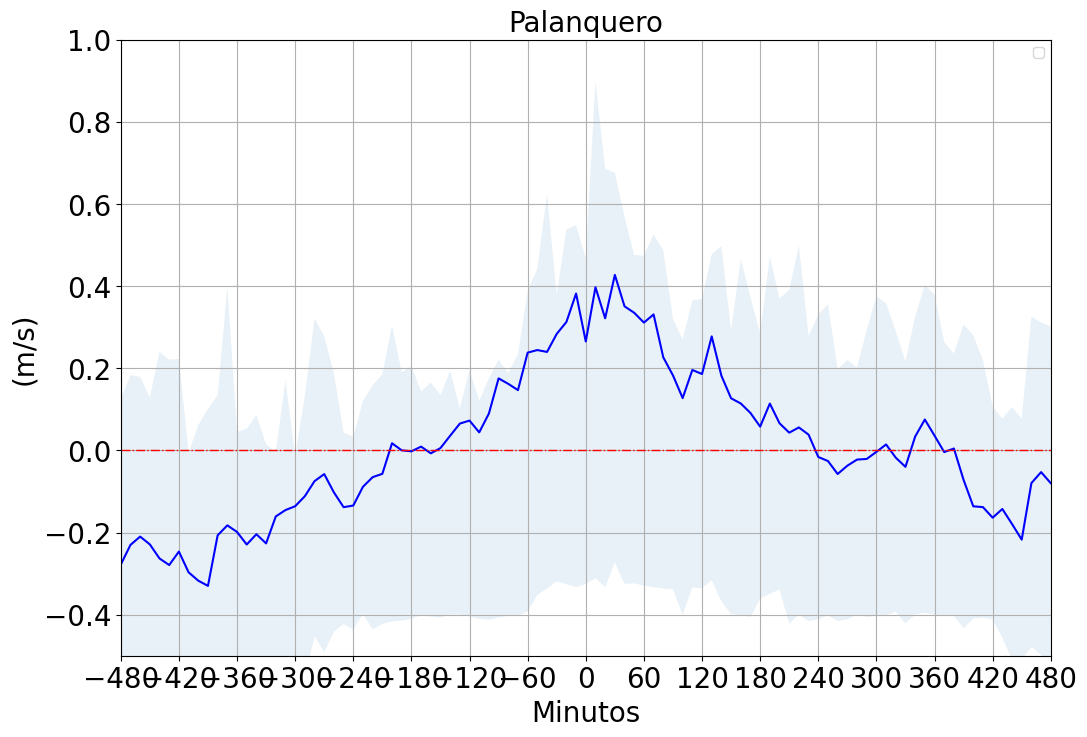

In [ ]:
list_percentil = [.10, .20,.25, .50, .75, .80, .90]
dfPercentilViento = dfCrossVientos.groupby("FECHA_POS")['VEL_VIENTO_anomalia'].quantile(list_percentil).reset_index()
dfAggViento = dfCrossVientos.groupby("FECHA_POS").agg({"VEL_VIENTO_anomalia" : ["mean", "std"]})

dfPercentilViento = dfPercentilViento.pivot(index='FECHA_POS', columns='level_1')['VEL_VIENTO_anomalia'].reset_index()
dfPercentilViento = dfPercentilViento.join(dfAggViento, "FECHA_POS")

dict_names = {'title' : 'Análisis de rapidez del viento', 
              'name2save' : f'analisis_rapidez_viento_percentil_20h_7h_{NOMBRE_ESTACION}_{int_minutes}m_anomalia_mean.png', 
              'ylabel' : '(m/s)'
              }

plot_percentil_interval(dfPercentilViento, [.25, .75], 'VEL_VIENTO_anomalia', dict_names['title'], dict_names['name2save'], dict_names['ylabel'], int_minutes, ylimit=[-.5, 1])

In [ ]:
dfCrossVientos

HORA_MINUTO  FECHA_POS                      FECHA  DIRECVIENTO  \
0           16:20     -480.0  2011-01-14 16:20:00-05:00          0.0   
1           16:30     -470.0  2011-01-14 16:30:00-05:00          0.0   
2           16:40     -460.0  2011-01-14 16:40:00-05:00          0.0   
3           16:50     -450.0  2011-01-14 16:50:00-05:00          1.0   
4           17:00     -440.0  2011-01-14 17:00:00-05:00          1.0   
...           ...        ...                        ...          ...   
14836       07:00      440.0  2017-12-29 07:00:00-05:00         22.0   
14837       07:10      450.0  2017-12-29 07:10:00-05:00        335.0   
14838       07:20      460.0  2017-12-29 07:20:00-05:00        339.0   
14839       07:30      470.0  2017-12-29 07:30:00-05:00        333.0   
14840       07:40      480.0  2017-12-29 07:40:00-05:00        325.0   

       VELVIENTO     FECHA_HORA      X_VIENTO  Y_VIENTO  VELVIENTO_mean  \
0            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.467479   
1            0.1  2011-01-14 16 -1.224647e-17 -0.100000        1.438536   
2            0.2  2011-01-14 16 -2.449294e-17 -0.200000        1.389983   
3            0.1  2011-01-14 16 -1.745241e-03 -0.099985        1.647001   
4            0.2  2011-01-14 17 -3.490481e-03 -0.199970        1.275676   
...          ...            ...           ...       ...             ...   
14836        1.2  2017-12-29 07 -4.495279e-01 -1.112621        0.539236   
14837        0.7  2017-12-29 07  2.958328e-01 -0.634415        0.558566   
14838        1.0  2017-12-29 07  3.583679e-01 -0.933580        0.578916   
14839        0.8  2017-12-29 07  3.631924e-01 -0.712805        0.597651   
14840        1.2  2017-12-29 07  6.882917e-01 -0.982982        0.620602   

       VEL_VIENTO_anomalia  
0                -1.367479  
1                -1.338536  
2                -1.189983  
3                -1.547001  
4                -1.075676  
...                    ...  
14836             0.660764  
14837             0.141434  
14838             0.421084  
14839             0.202349  
14840             0.579398  

[14841 rows x 10 columns]

# Análisis de viento por hora

In [ ]:
dfCrossVientosHora = pd.merge(dfEventAn, df10m, on='FECHA', how = 'left')

dfCrossVientosHora
# dfCrossVientosHoraGroup = dfCrossVientosHora.groupby("FECHA_POS").agg({"X_VIENTO" : "mean", "Y_VIENTO" : "mean"}).reset_index()

dfCrossVientosHora['DIR_VIENTO'] = dfCrossVientosHora.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
dfCrossVientosHora['DIR_VIENTO'] = (dfCrossVientosHora['DIR_VIENTO'] + 180.0) % 360
dfCrossVientosHora['VEL_VIENTO'] = dfCrossVientosHora.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

dfCrossVientosHora

index              FECHA_EVENTO                 FECHA_MIN  min_t  \
0         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
1         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
2         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
3         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
4         0 2011-01-15 00:00:00-05:00 2011-01-15 00:20:00-05:00  206.7   
...     ...                       ...                       ...    ...   
2596    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2597    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2598    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2599    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   
2600    152 2017-12-29 00:00:00-05:00 2017-12-28 23:40:00-05:00  202.5   

       lon_t  lat_t                      FECHA  FECHA_POS     FECHA_HORA  \
0    -74.836  5.627  2011-01-14 16:00:00-05:00       -8.0  2011-01-14 16   
1    -74.836  5.627  2011-01-14 17:00:00-05:00       -7.0  2011-01-14 17   
2    -74.836  5.627  2011-01-14 18:00:00-05:00       -6.0  2011-01-14 18   
3    -74.836  5.627  2011-01-14 19:00:00-05:00       -5.0  2011-01-14 19   
4    -74.836  5.627  2011-01-14 20:00:00-05:00       -4.0  2011-01-14 20   
...      ...    ...                        ...        ...            ...   
2596 -74.836  5.484  2017-12-29 04:00:00-05:00        4.0  2017-12-29 04   
2597 -74.836  5.484  2017-12-29 05:00:00-05:00        5.0  2017-12-29 05   
2598 -74.836  5.484  2017-12-29 06:00:00-05:00        6.0  2017-12-29 06   
2599 -74.836  5.484  2017-12-29 07:00:00-05:00        7.0  2017-12-29 07   
2600 -74.836  5.484  2017-12-29 08:00:00-05:00        8.0  2017-12-29 08   

      X_VIENTO  Y_VIENTO HORA   DIRVIENTO  VELVIENTO  DIR_VIENTO  VEL_VIENTO  
0    -0.008371 -0.114574   16  184.178717   0.114880    4.178717    0.114880  
1    -0.005520 -0.149800   17  182.110501   0.149901    2.110501    0.149901  
2    -0.003490 -0.133272   18  181.499962   0.133318    1.499962    0.133318  
3    -0.027756 -0.195051   19  188.098946   0.197016    8.098946    0.197016  
4    -0.035483 -0.139636   20  194.257519   0.144074   14.257519    0.144074  
...        ...       ...  ...         ...        ...         ...         ...  
2596  0.315911  0.395494   04   38.617059   0.506177  218.617059    0.506177  
2597  0.253255 -1.002975   05  165.828832   1.034454  345.828832    1.034454  
2598 -0.014317 -1.094360   06  180.749551   1.094453    0.749551    1.094453  
2599  0.165950 -0.855470   07  169.021692   0.871417  349.021692    0.871417  
2600 -0.392705 -0.380243   08  225.923677   0.546627   45.923677    0.546627  

[2601 rows x 16 columns]

In [ ]:
def plot_windrose(df, title, path_to_save):
  ax = WindroseAxes.from_ax()

  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 5, 0.5), edgecolor='white', cmap=cm.cool)
  ax.set_legend(loc = 3)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
  plt.title(title)
  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
  plt.show()

In [ ]:
posHoras = set(list(dfCrossVientosHora['FECHA_POS']))
posHoras

{-8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0}

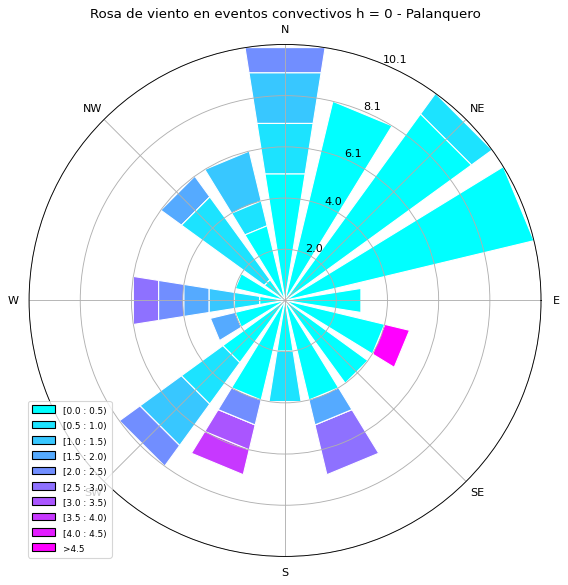

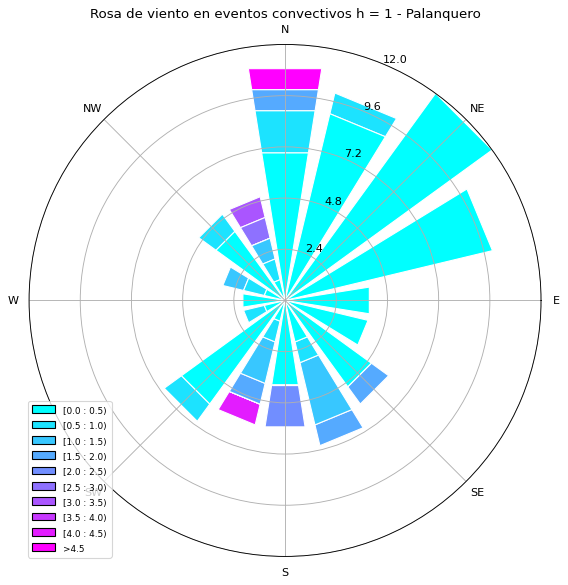

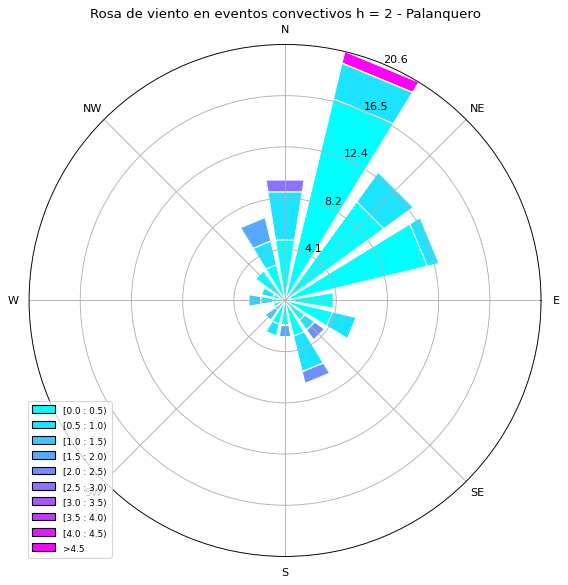

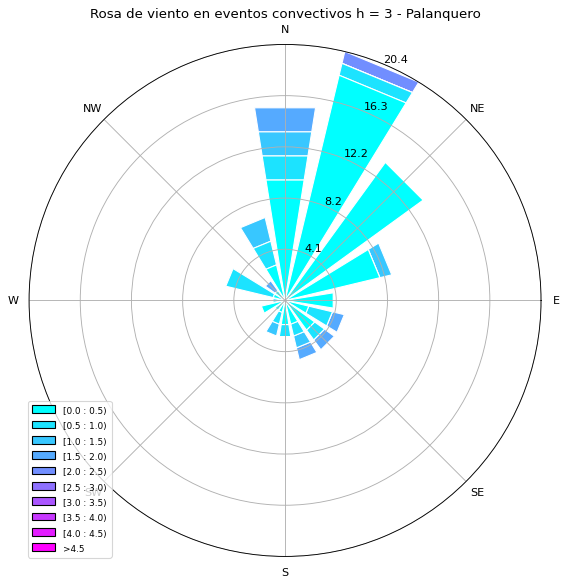

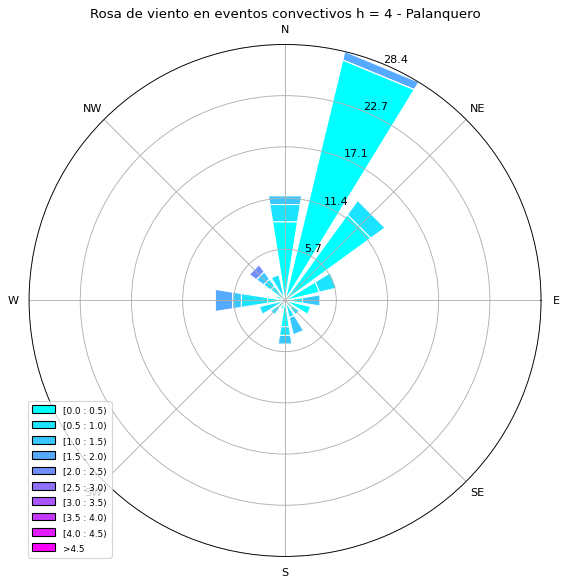

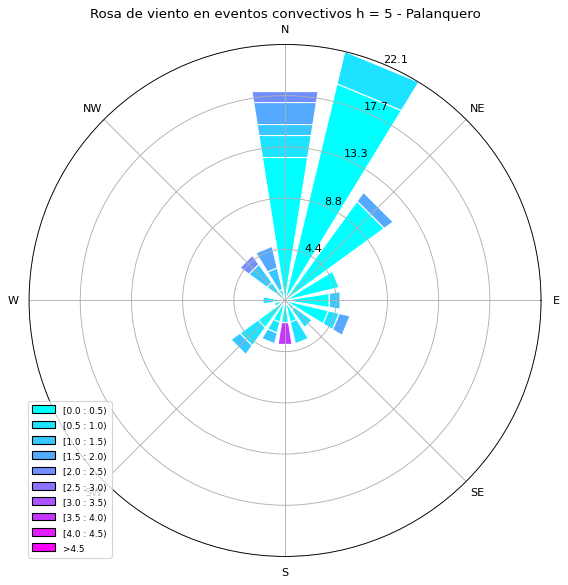

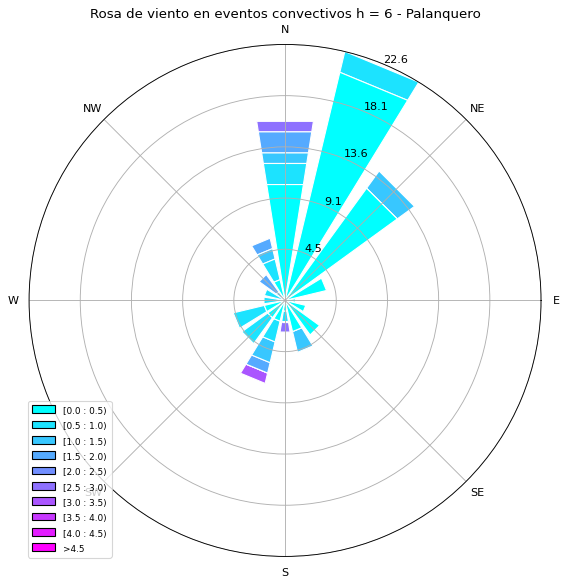

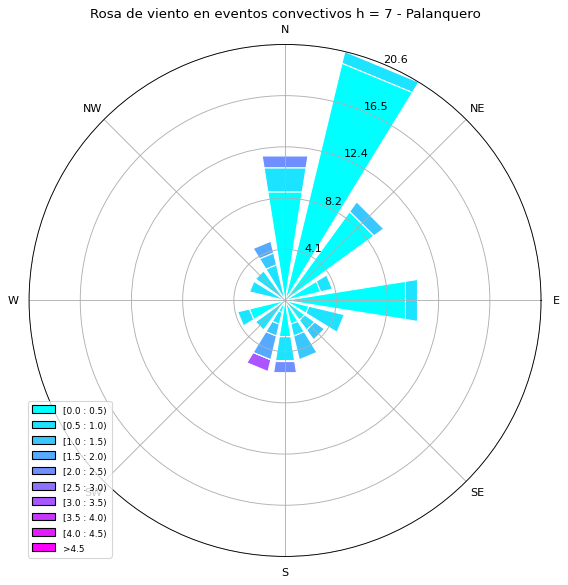

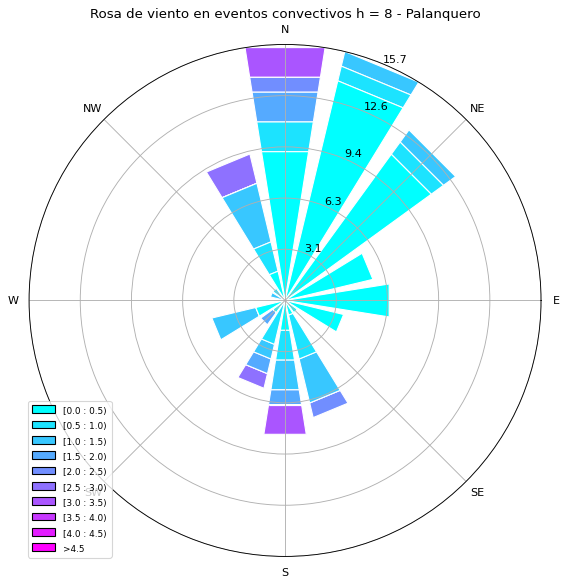

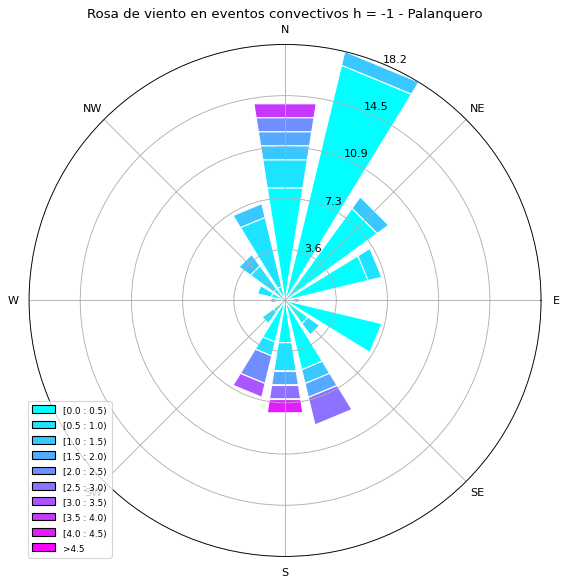

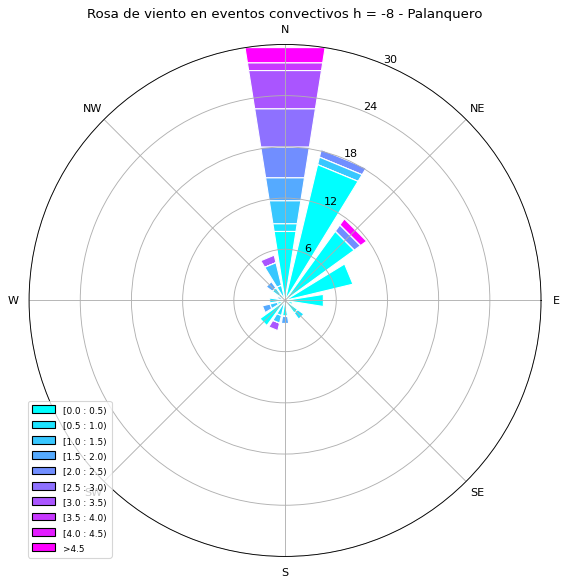

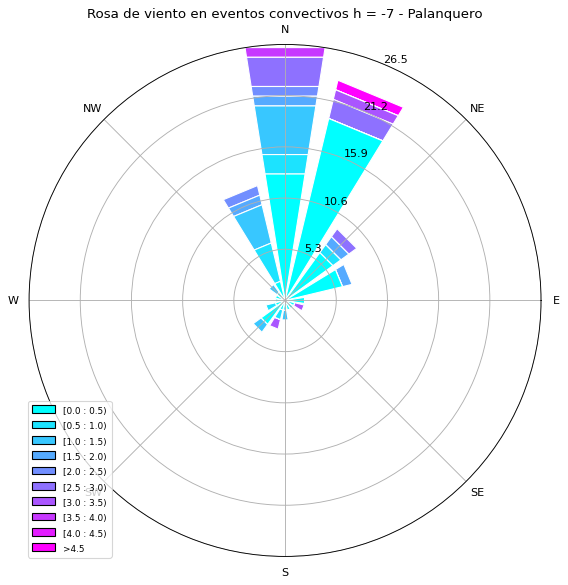

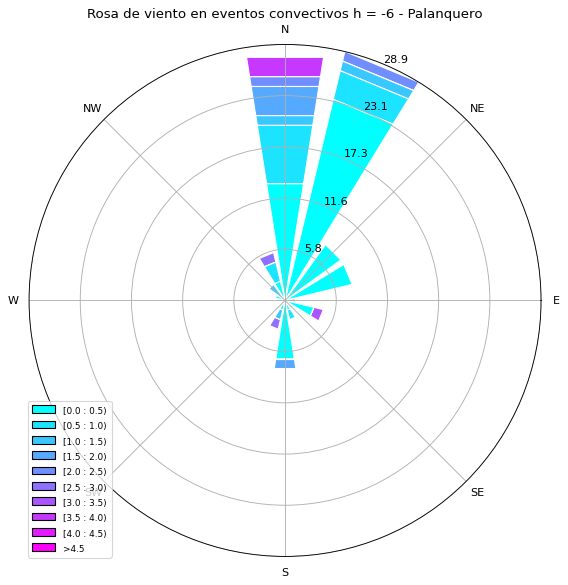

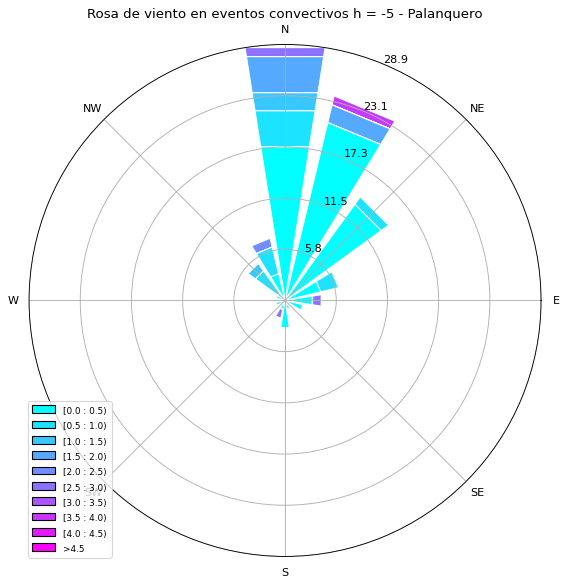

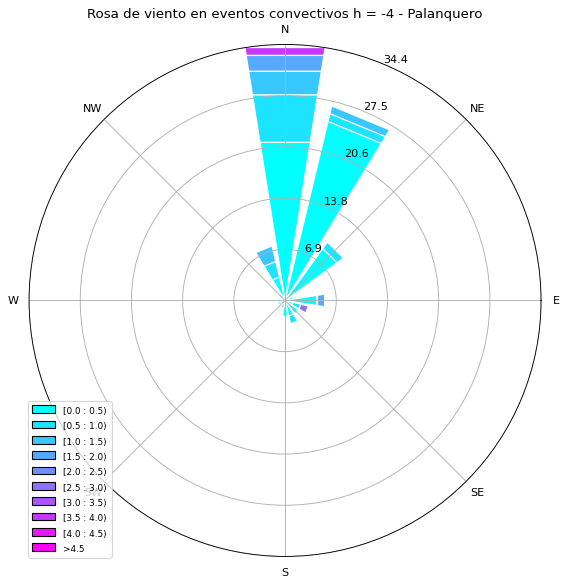

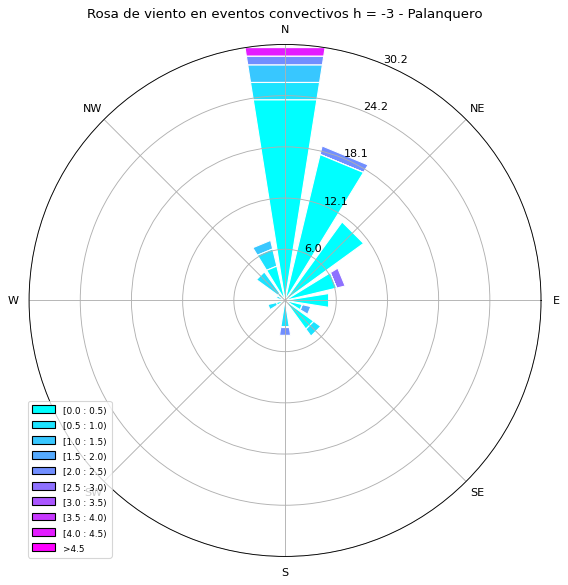

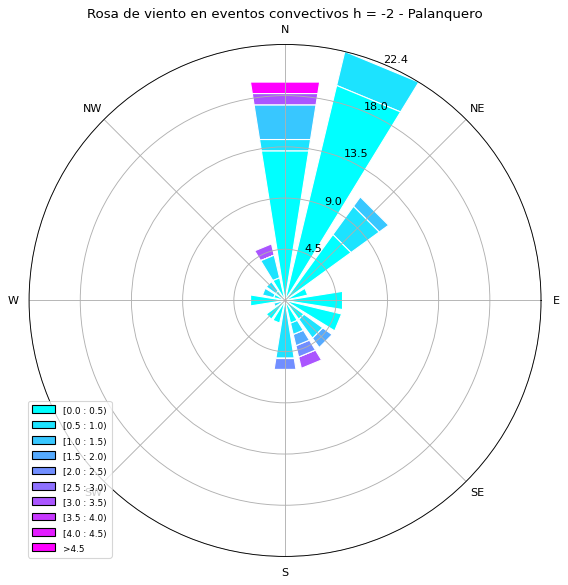

In [ ]:
for hora in posHoras:
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'Rosa de viento en eventos convectivos h = {int(hora)} - {NOMBRE_ESTACION.capitalize()}'
  path_to_save = f'windrose_eventos_convectivos_hora_20h_7h_{int(hora)}_{NOMBRE_ESTACION.lower()}.png'
    
  plot_windrose(dft, title, path_to_save)

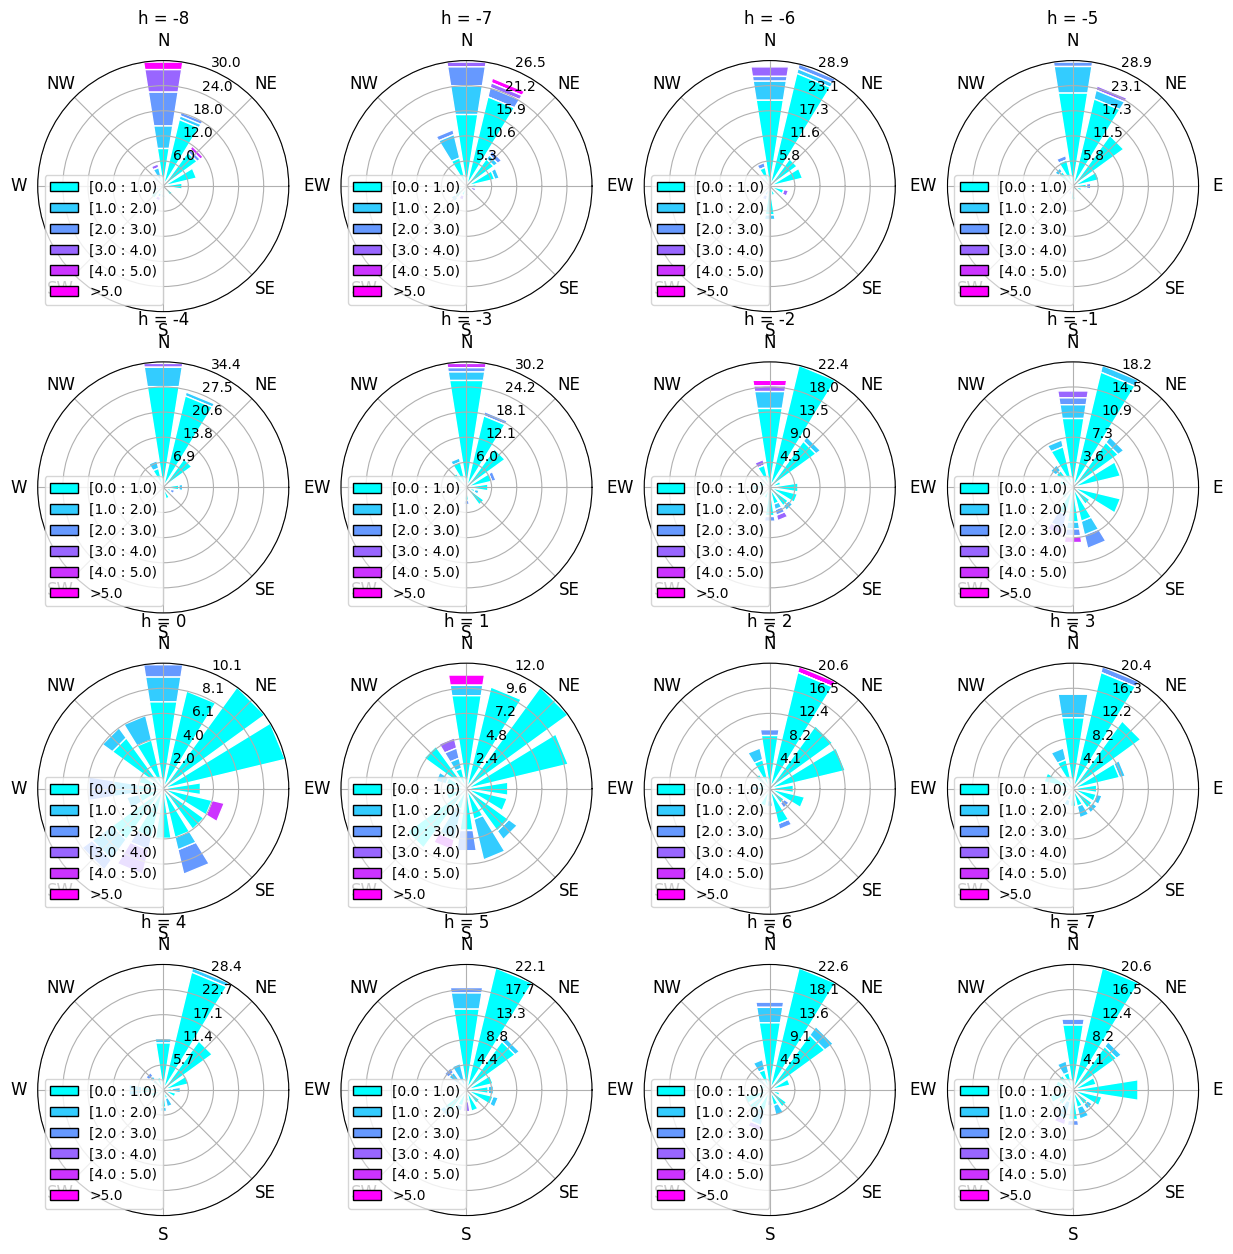

In [ ]:
def plot_windrose_2(df, title, ax):
  ax.bar(df['DIR_VIENTO'], df['VEL_VIENTO'], normed=True, opening=0.8, bins=np.arange(0.0, 6), edgecolor='white', cmap=cm.cool)
  ax.legend(loc = 3, fontsize= 10)
  ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'], fontsize= 12)
  ax.set_title(title)


fig, axs = plt.subplots(4, 4,figsize=(15,15),  subplot_kw=dict(projection="windrose"))
horas = list(posHoras)
horas.sort()

for ax, hora in zip(axs.reshape(16), horas):
  dft = dfCrossVientosHora.loc[dfCrossVientosHora['FECHA_POS'] == hora]
  title = f'h = {int(hora)}'
  plot_windrose_2(dft, title, ax)

path_to_save = f'subplot_vientos_20h_7h_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )
plt.show()

# Gráficos multivariables en único Plot

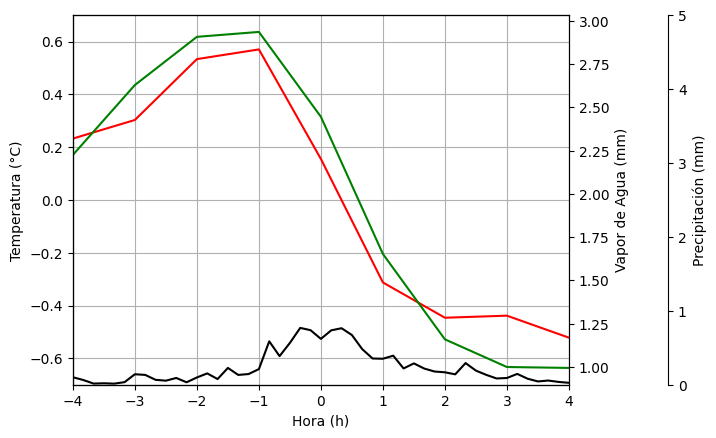

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PWV_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossPrecGroup['FECHA_POS']/60.0, dfCrossPrecGroup[('PREC', 'mean')], c = 'black')
ax3.set_ylim(0, 5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Vapor de Agua (mm)")
ax3.set_ylabel("Precipitación (mm)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pwv_vs_prec_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )

KeyError: ignored

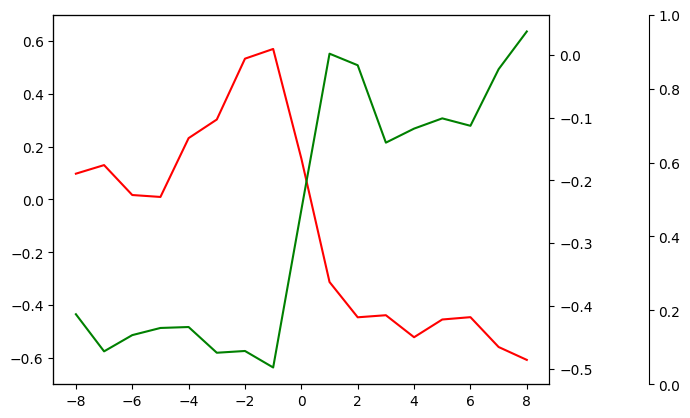

In [ ]:
fig, ax = plt.subplots()
ax.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('TEMP_anomalia', 'mean')], c = 'red')
ax.set_ylim(-0.7, 0.7)

ax2=ax.twinx()
ax2.plot(dfAnomalia['FECHA_POS'], dfAnomalia[('PRESION_anomalia', 'mean')], c = 'green')

ax3=ax.twinx()
ax3.spines['right'].set_position(('axes', 1.2))
ax3.plot(dfCrossVientosGroup2['FECHA_POS']/60.0, dfCrossVientosGroup['VEL_VIENTO'], c = 'black')
# ax3.set_ylim(0, 0.5)

ax.set_xlim(-4, 4)
ax.grid()

ax.set_ylabel("Temperatura (°C)")
ax2.set_ylabel("Presión (hPa)")
ax3.set_ylabel("Velocidad del viento (m/s)")
ax.set_xlabel("Hora (h)")

path_to_save = f'temp_vs_pres_vs_velviento_anomalias_{NOMBRE_ESTACION}.png'
plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + path_to_save, format='png', bbox_inches = 'tight' )